In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

EDA 

target: AMT_CREDIT and Target


How much loan amount a user is likely to request based on their profile.

In [2]:
df1=pd.read_csv('../data/final/aggregated_table.csv')

In [3]:
df1.shape

(264909, 52)

In [4]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,inst_mean_payment_delay,inst_mean_payment_rate,avg_prev_amt_requested,prev_num_approved,prev_num_rejected,prev_num_applications,avg_cc_amt_balance,avg_cc_amt_payment_total_current,max_cc_sk_dpd,max_cc_sk_dpd_def
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-20.421053,1.000000,179055.00,1,0,1,26577.436875,4098.234375,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-7.160000,1.000000,435436.50,3,0,3,26577.436875,4098.234375,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-7.666667,1.000000,24282.00,1,0,1,26577.436875,4098.234375,0.0,0.0
3,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3.636364,0.954545,150530.25,6,0,6,26577.436875,4098.234375,0.0,0.0
4,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,26.114286,0.971429,155701.80,4,1,5,26577.436875,4098.234375,0.0,0.0


In [5]:
df1.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,inst_mean_payment_delay,inst_mean_payment_rate,avg_prev_amt_requested,prev_num_approved,prev_num_rejected,prev_num_applications,avg_cc_amt_balance,avg_cc_amt_payment_total_current,max_cc_sk_dpd,max_cc_sk_dpd_def
235377,416699,0,Cash loans,F,N,Y,0,90000.0,450000.0,27324.0,...,-3.934959,0.934959,218250.000000,1,1,2,24784.814681,6961.628777,32.0,1.0
156305,310179,0,Cash loans,F,N,N,0,202500.0,508495.5,38146.5,...,-12.250000,1.000000,146255.850000,2,1,3,26577.436875,4098.234375,0.0,0.0
133580,279518,0,Cash loans,M,N,Y,0,135000.0,398160.0,25573.5,...,-5.736842,0.815789,113270.785714,5,2,7,26577.436875,4098.234375,0.0,0.0
71629,196263,0,Revolving loans,M,N,Y,1,180000.0,180000.0,9000.0,...,-11.500000,1.000000,36400.500000,1,1,2,26577.436875,4098.234375,0.0,0.0
34605,146511,0,Cash loans,M,Y,N,0,225000.0,225000.0,15034.5,...,-1.892857,1.000000,82500.000000,1,2,3,24567.656471,5589.705882,0.0,0.0


In [6]:
df1.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         0
AMT_GOODS_PRICE                     0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
OCCUPATION_TYPE                     0
CNT_FAM_MEMBERS                     0
REGION_RATING_CLIENT                0
ORGANIZATION_TYPE                   0
EXT_SOURCE_1                        0
EXT_SOURCE_2                        0
EXT_SOURCE_3                        0
OBS_30_CNT_S

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264909 entries, 0 to 264908
Data columns (total 52 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   SK_ID_CURR                        264909 non-null  int64  
 1   TARGET                            264909 non-null  int64  
 2   NAME_CONTRACT_TYPE                264909 non-null  object 
 3   CODE_GENDER                       264909 non-null  object 
 4   FLAG_OWN_CAR                      264909 non-null  object 
 5   FLAG_OWN_REALTY                   264909 non-null  object 
 6   CNT_CHILDREN                      264909 non-null  int64  
 7   AMT_INCOME_TOTAL                  264909 non-null  float64
 8   AMT_CREDIT                        264909 non-null  float64
 9   AMT_ANNUITY                       264909 non-null  float64
 10  AMT_GOODS_PRICE                   264909 non-null  float64
 11  NAME_INCOME_TYPE                  264909 non-null  o

In [8]:
df1["Credit_to_Income_Ratio"] = df1["AMT_CREDIT"] / df1["AMT_INCOME_TOTAL"].replace(0, np.nan)
df1["Annuity_to_Income_Ratio"] = df1["AMT_ANNUITY"] / df1["AMT_INCOME_TOTAL"].replace(0, np.nan)
df1["Annuity_to_Credit_Ratio"] = df1["AMT_ANNUITY"] / df1["AMT_CREDIT"].replace(0, np.nan)

In [9]:
df1["Credit_to_Income_Ratio"]=df1["Credit_to_Income_Ratio"].fillna(df1["Credit_to_Income_Ratio"].median())
df1["Annuity_to_Income_Ratio"]=df1["Annuity_to_Income_Ratio"].fillna(df1["Annuity_to_Income_Ratio"].median())
df1["Annuity_to_Credit_Ratio"]=df1["Annuity_to_Credit_Ratio"].fillna(df1["Annuity_to_Credit_Ratio"].median())

In [10]:

num_cols = df1.select_dtypes(include=['int64', 'float64'])

zero_counts =((num_cols == 0).sum() / len(df1)) * 100

print("Number of zeros in each numeric column:")
print(zero_counts)

Number of zeros in each numeric column:
SK_ID_CURR                           0.000000
TARGET                              92.265268
CNT_CHILDREN                        69.675247
AMT_INCOME_TOTAL                     0.000000
AMT_CREDIT                           0.000000
AMT_ANNUITY                          0.000000
AMT_GOODS_PRICE                      0.000000
REGION_POPULATION_RELATIVE           0.000000
DAYS_BIRTH                           0.000000
DAYS_EMPLOYED                        0.000755
DAYS_REGISTRATION                    0.024159
CNT_FAM_MEMBERS                      0.000000
REGION_RATING_CLIENT                 0.000000
EXT_SOURCE_1                         0.000000
EXT_SOURCE_2                         0.000000
EXT_SOURCE_3                         0.000000
OBS_30_CNT_SOCIAL_CIRCLE            53.202798
DEF_30_CNT_SOCIAL_CIRCLE            88.507374
OBS_60_CNT_SOCIAL_CIRCLE            53.453073
DEF_60_CNT_SOCIAL_CIRCLE            91.612591
DAYS_LAST_PHONE_CHANGE              11.9

In [11]:
df1.nunique()

SK_ID_CURR                          264909
TARGET                                   2
NAME_CONTRACT_TYPE                       2
CODE_GENDER                              3
FLAG_OWN_CAR                             2
FLAG_OWN_REALTY                          2
CNT_CHILDREN                            15
AMT_INCOME_TOTAL                      2186
AMT_CREDIT                            5266
AMT_ANNUITY                          13195
AMT_GOODS_PRICE                        841
NAME_INCOME_TYPE                         8
NAME_EDUCATION_TYPE                      5
NAME_FAMILY_STATUS                       5
NAME_HOUSING_TYPE                        6
REGION_POPULATION_RELATIVE              81
DAYS_BIRTH                           17399
DAYS_EMPLOYED                        12384
DAYS_REGISTRATION                    15502
OCCUPATION_TYPE                         19
CNT_FAM_MEMBERS                         17
REGION_RATING_CLIENT                     3
ORGANIZATION_TYPE                       58
EXT_SOURCE_

In [12]:

corr_matrix = df1.corr(numeric_only=True).abs()

high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > 0.85:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            high_corr_pairs.append((col1, col2, corr_value))

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Column1', 'Column2', 'Correlation'])
display(high_corr_df)

,Column1,Column2,Correlation
0,CNT_CHILDREN,CNT_FAM_MEMBERS,0.880886
1,AMT_CREDIT,AMT_GOODS_PRICE,0.986871
2,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998513
3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.859348
4,pos_num_loans,prev_num_approved,0.951700
5,prev_num_rejected,prev_num_applications,0.866994


In [ ]:
df1.drop(columns=['CNT_CHILDREN','AMT_GOODS_PRICE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'prev_num_applications','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_QRT'], inplace=True, errors='ignore')

In [32]:
df=df1.copy()

Normalization

In [30]:

num_cols = df.select_dtypes(include=['int64', 'float64'])

zero_counts =((num_cols == 0).sum() / len(df)) * 100

print("Number of zeros in each numeric column:")
print(zero_counts)

Number of zeros in each numeric column:
SK_ID_CURR                           0.000000
TARGET                              92.265268
AMT_INCOME_TOTAL                     0.000000
AMT_CREDIT                           0.000000
AMT_ANNUITY                          0.000000
REGION_POPULATION_RELATIVE           0.000000
DAYS_BIRTH                           0.000000
DAYS_EMPLOYED                        0.000755
DAYS_REGISTRATION                    0.024159
CNT_FAM_MEMBERS                      0.000000
REGION_RATING_CLIENT                 0.000000
EXT_SOURCE_1                         0.000000
EXT_SOURCE_2                         0.000000
EXT_SOURCE_3                         0.000000
OBS_60_CNT_SOCIAL_CIRCLE            53.453073
DEF_60_CNT_SOCIAL_CIRCLE            91.612591
DAYS_LAST_PHONE_CHANGE              11.951651
AMT_REQ_CREDIT_BUREAU_MON           83.528306
AMT_REQ_CREDIT_BUREAU_YEAR          26.945479
bureau_overdue_months               98.435312
AVG_Loan_Amount                     90.6

In [31]:
df1.drop(columns=['AVG_Loan_Amount'], inplace=True, errors='ignore')

In [33]:
df1['AMT_REQ_CREDIT_BUREAU_MON']=(df1['AMT_REQ_CREDIT_BUREAU_MON']>0).astype(int)
df1['bureau_overdue_months']=(df1['bureau_overdue_months']>0).astype(int)
df1['total_active_bureau_loans']=(df1['total_active_bureau_loans']>0).astype(int)
df1['max_cc_sk_dpd']=(df1['max_cc_sk_dpd']>0).astype(int)
df1['max_cc_sk_dpd_def']=(df1['max_cc_sk_dpd_def']>0).astype(int)

In [34]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,...,avg_prev_amt_requested,prev_num_approved,prev_num_rejected,avg_cc_amt_balance,avg_cc_amt_payment_total_current,max_cc_sk_dpd,max_cc_sk_dpd_def,Credit_to_Income_Ratio,Annuity_to_Income_Ratio,Annuity_to_Credit_Ratio
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,Working,...,179055.00,1,0,26577.436875,4098.234375,0.0,0.0,2.007889,0.121978,0.060749
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,State servant,...,435436.50,3,0,26577.436875,4098.234375,0.0,0.0,4.790750,0.132217,0.027598
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,Working,...,24282.00,1,0,26577.436875,4098.234375,0.0,0.0,2.000000,0.100000,0.050000
3,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,Working,...,150530.25,6,0,26577.436875,4098.234375,0.0,0.0,4.222222,0.179963,0.042623
4,100008,0,Cash loans,M,N,Y,99000.0,490495.5,27517.5,State servant,...,155701.80,4,1,26577.436875,4098.234375,0.0,0.0,4.954500,0.277955,0.056101


univarte_plots Numeric

In [35]:
df1['EMPLOYED_FLAG'] = (df1['DAYS_EMPLOYED'] < 365243).astype(int)
df1.drop(columns=['DAYS_EMPLOYED'], inplace=True, errors='ignore')

In [37]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['SK_ID_CURR', 'TARGET','REGION_RATING_CLIENT','CNT_FAM_MEMBERS','OBS_60_CNT_SOCIAL_CIRCLE', 
                     'DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR','bureau_overdue_months',
                     'total_active_bureau_loans', 'pos_num_loans','max_cc_sk_dpd', 'max_cc_sk_dpd_def','inst_mean_payment_rate','prev_num_approved', "prev_num_rejected"])

In [38]:
summary_stats = df[num_cols].describe().T
summary_stats['median'] = df[num_cols].median()
summary_stats['skew'] = df[num_cols].skew()
display(summary_stats.head())

,count,mean,std,min,25%,50%,75%,max,median,skew
AMT_INCOME_TOTAL,264909.0,171174.559254,248664.434082,26100.00000,112500.000000,157500.00000,202500.000000,1.170000e+08,157500.00000,392.066330
AMT_CREDIT,264909.0,607155.607963,404952.364909,45000.00000,273636.000000,521280.00000,814041.000000,4.050000e+06,521280.00000,1.216736
AMT_ANNUITY,264909.0,27203.415903,14378.642430,1615.50000,16677.000000,25015.50000,34749.000000,2.580255e+05,25015.50000,1.540202
REGION_POPULATION_RELATIVE,264909.0,0.020820,0.013728,0.00029,0.010006,0.01885,0.028663,7.250800e-02,0.01885,1.487049
DAYS_BIRTH,264909.0,-16117.732229,4308.965785,-25201.00000,-19715.000000,-15813.00000,-12570.000000,-7.489000e+03,-15813.00000,-0.116835


In [39]:
num_cols_parts = np.array_split(num_cols, 3)

part1, part2, part3= num_cols_parts

In [40]:
cols=["AMT_INCOME_TOTAL", "AMT_ANNUITY","pos_mean_cnt_instalment","inst_mean_payment_delay","avg_prev_amt_requested", "avg_cc_amt_balance", "avg_cc_amt_payment_total_current"]

In [41]:
df[cols]=np.log1p(df[cols])
for col in cols:
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(upper=upper)

c:\Users\parvr\anaconda3\envs\fintech\lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)
c:\Users\parvr\anaconda3\envs\fintech\lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


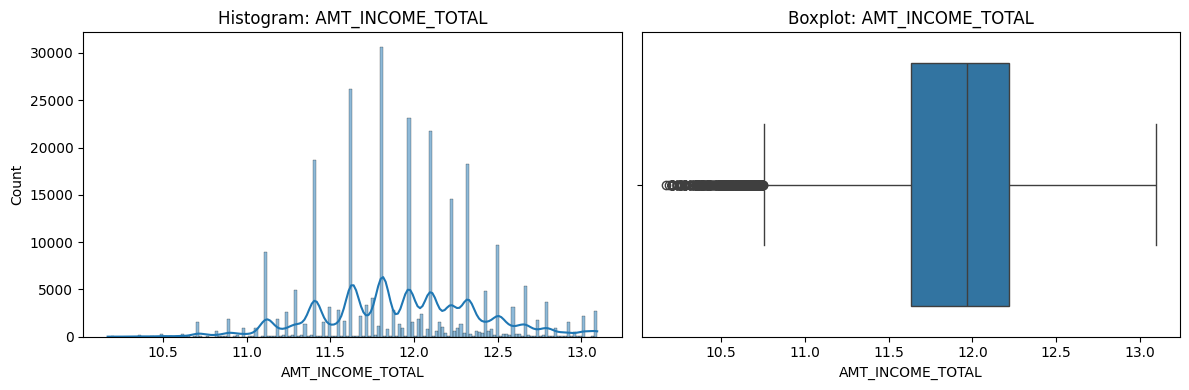

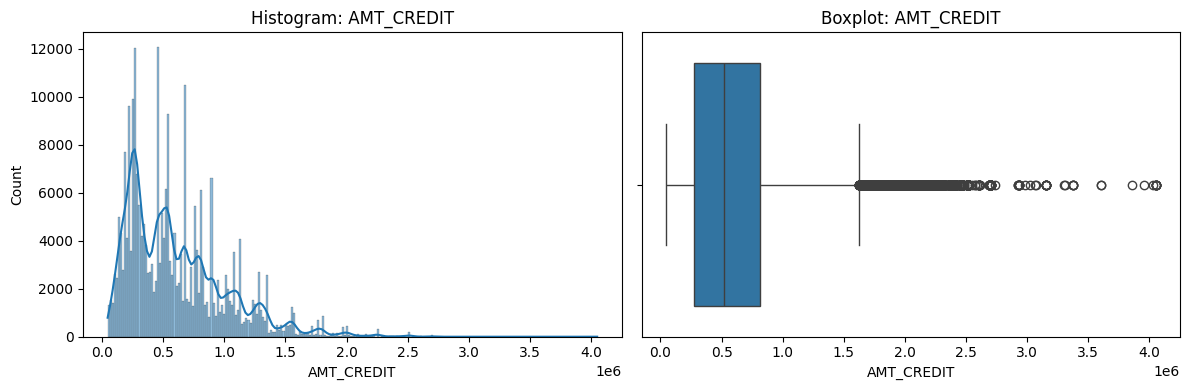

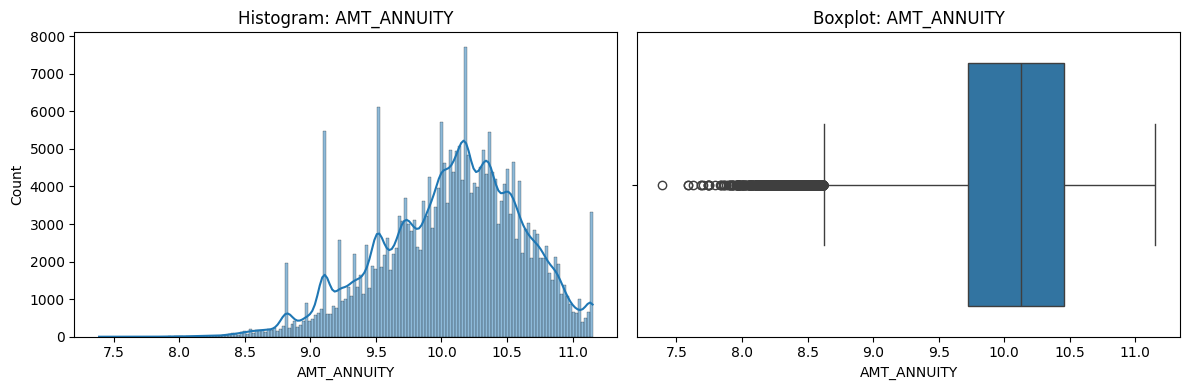

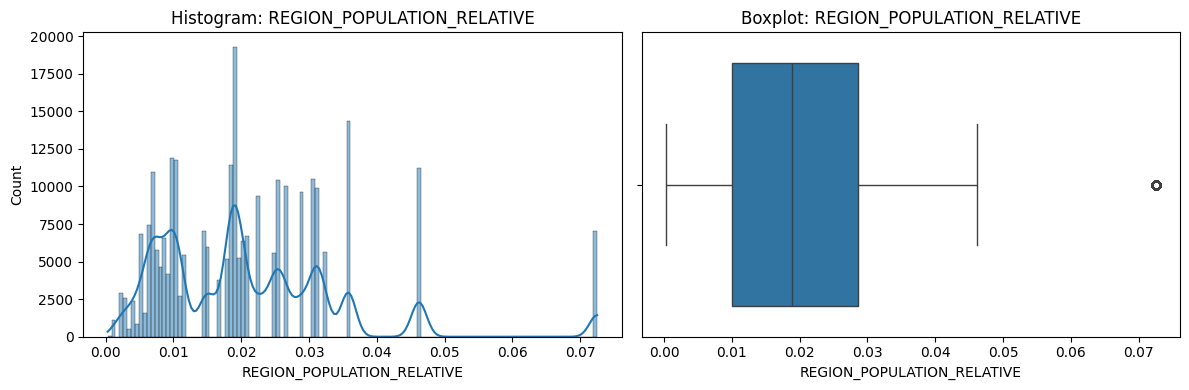

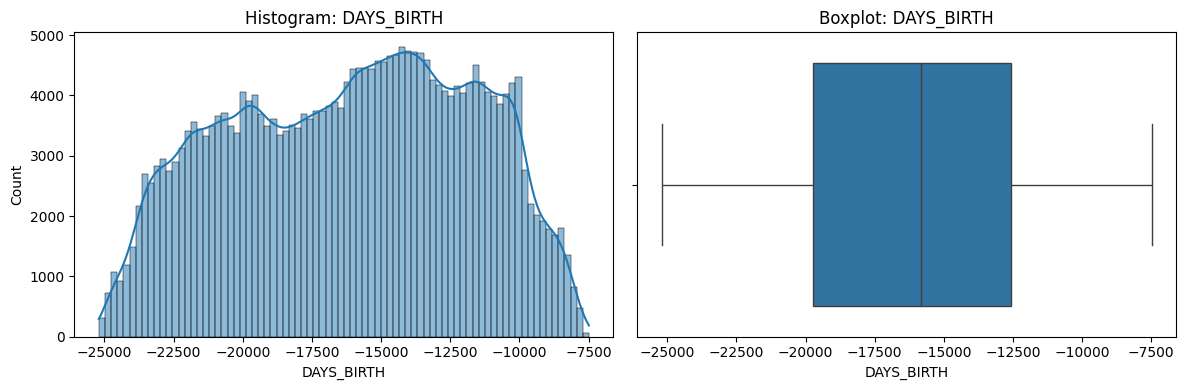

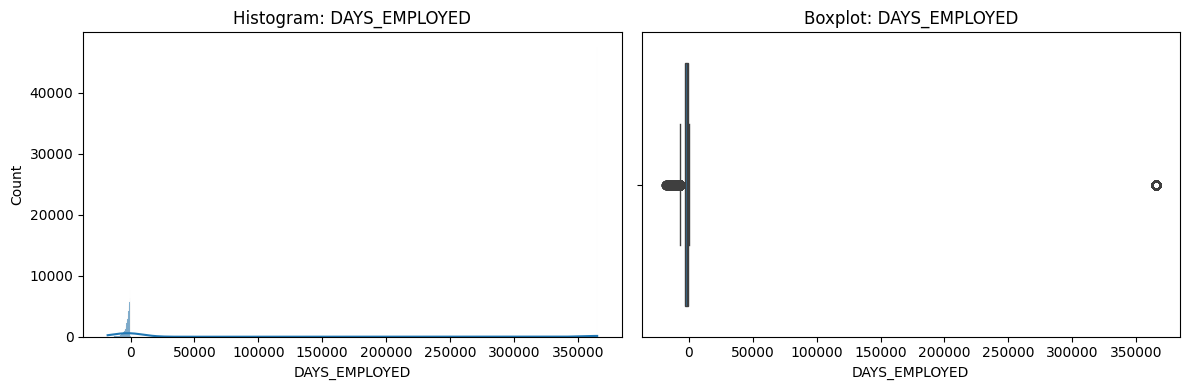

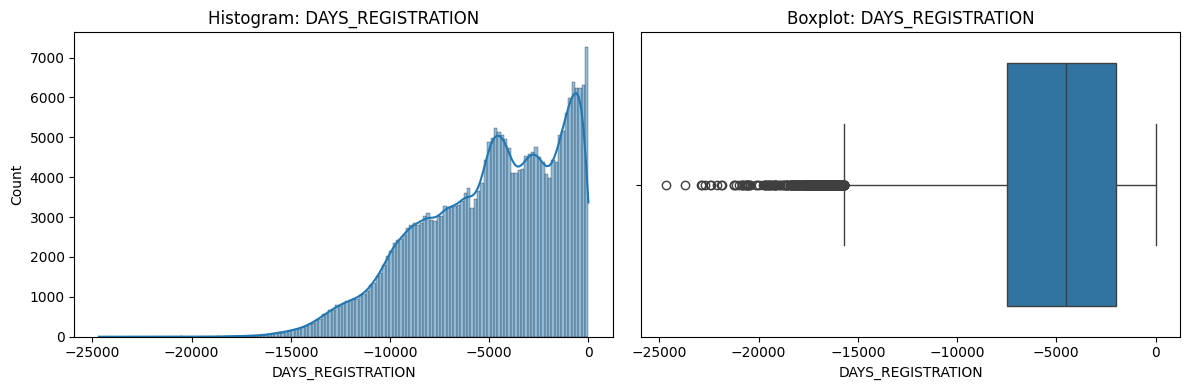

In [42]:
for col in part1:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(data=df, x=col, ax=axes[0], kde=True)
    axes[0].set_title(f"Histogram: {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot: {col}")

    plt.tight_layout()
    plt.show()

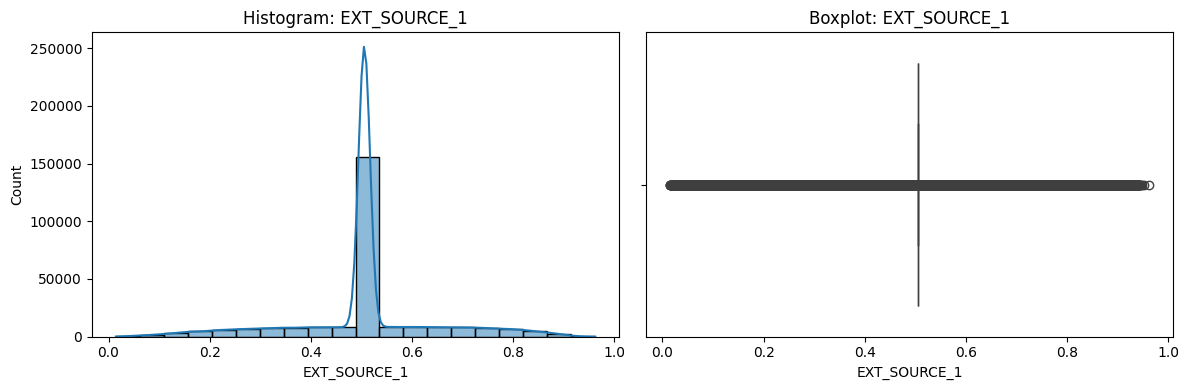

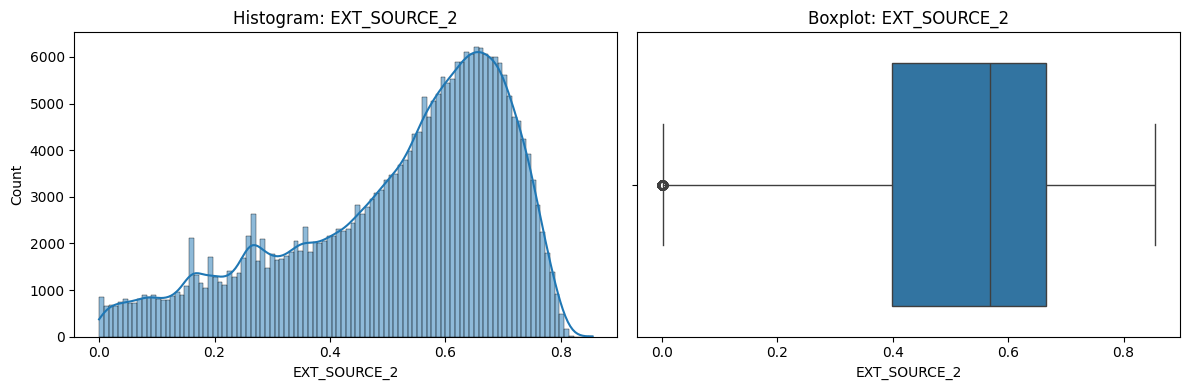

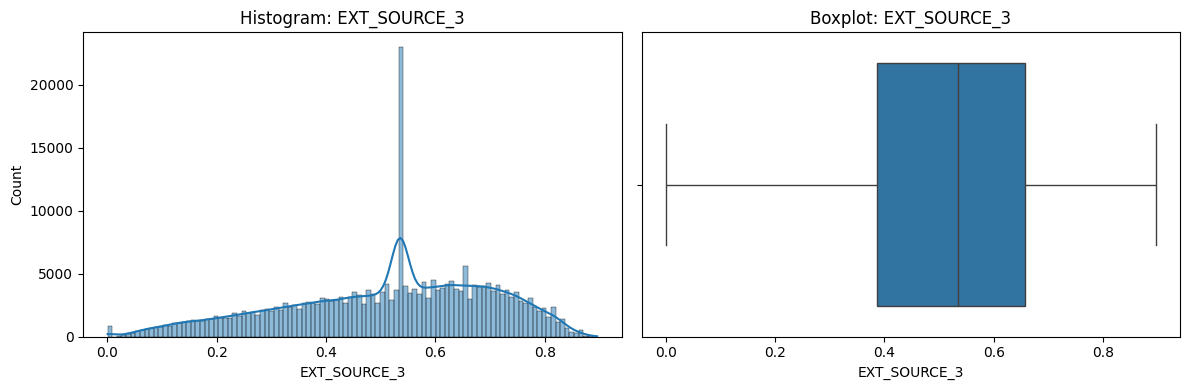

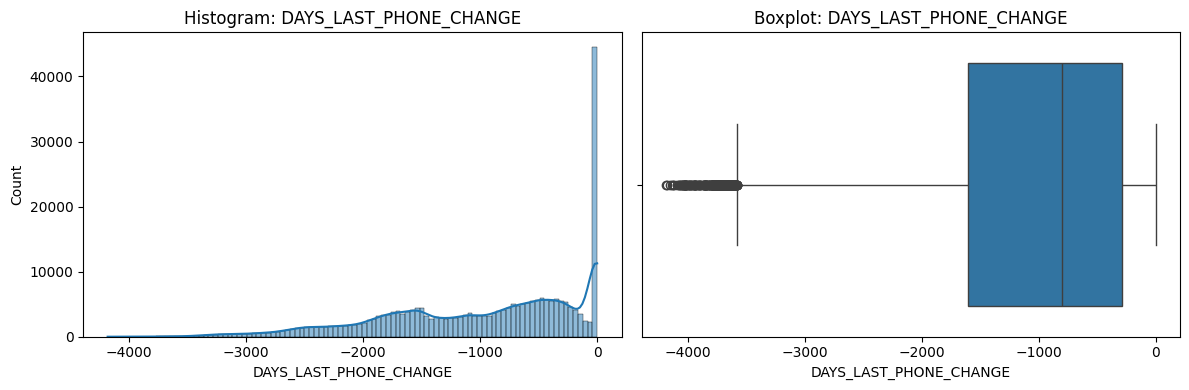

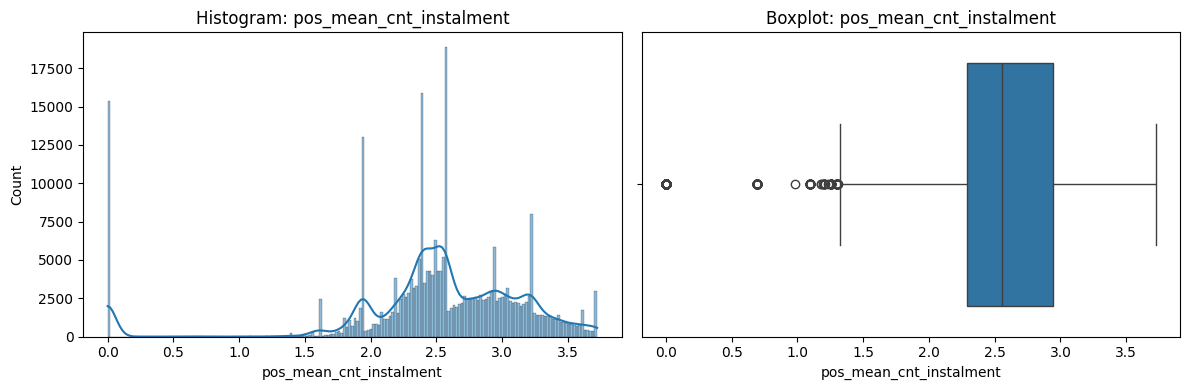

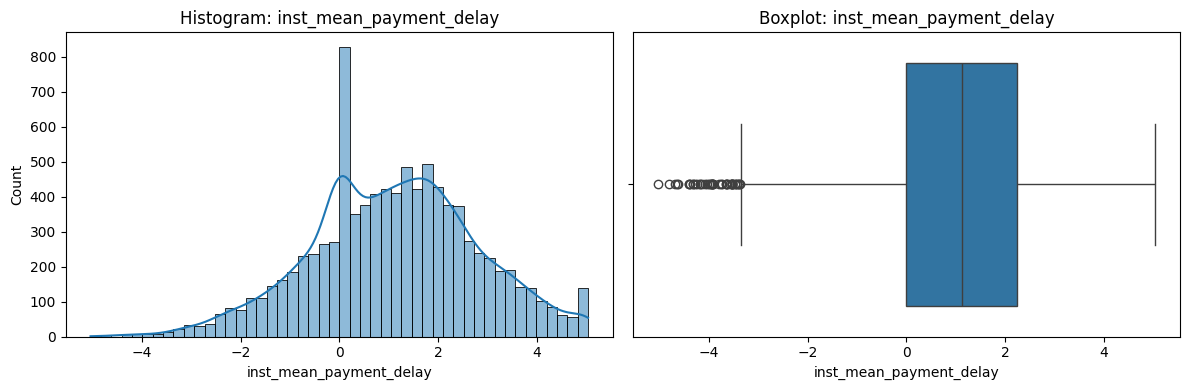

In [43]:
for col in part2:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(data=df, x=col, ax=axes[0], kde=True)
    axes[0].set_title(f"Histogram: {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot: {col}")

    plt.tight_layout()
    plt.show()

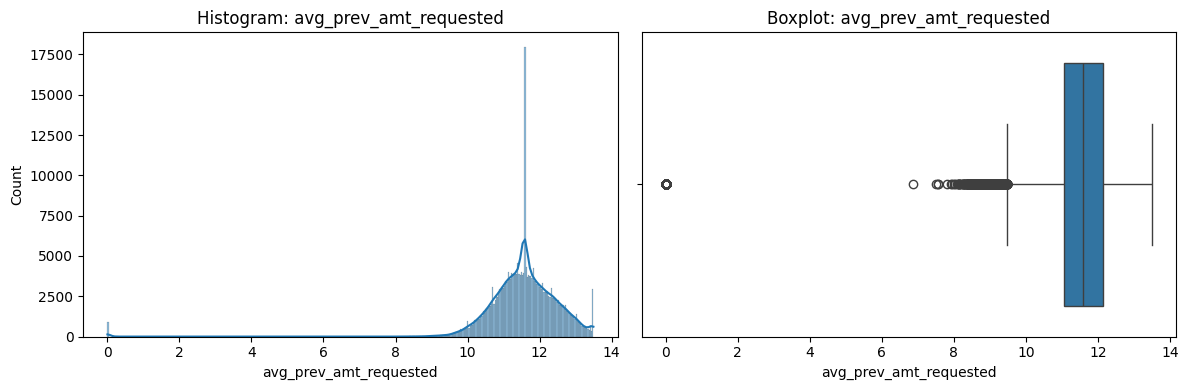

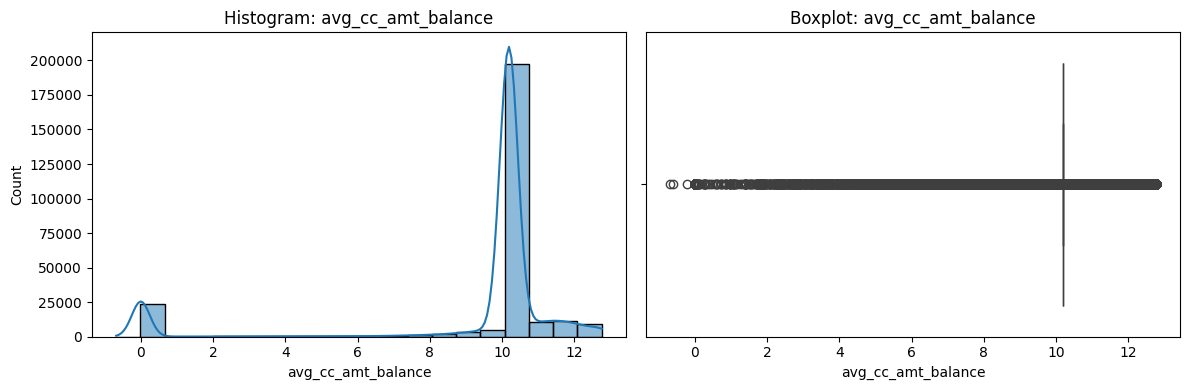

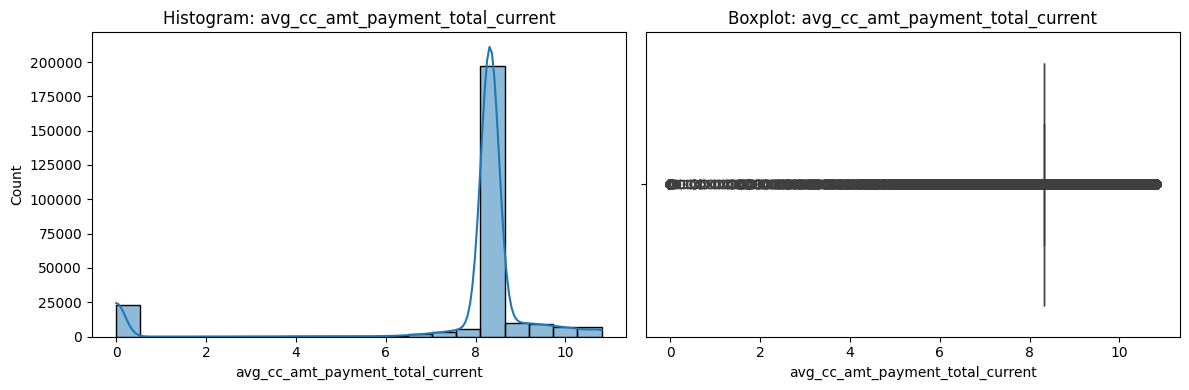

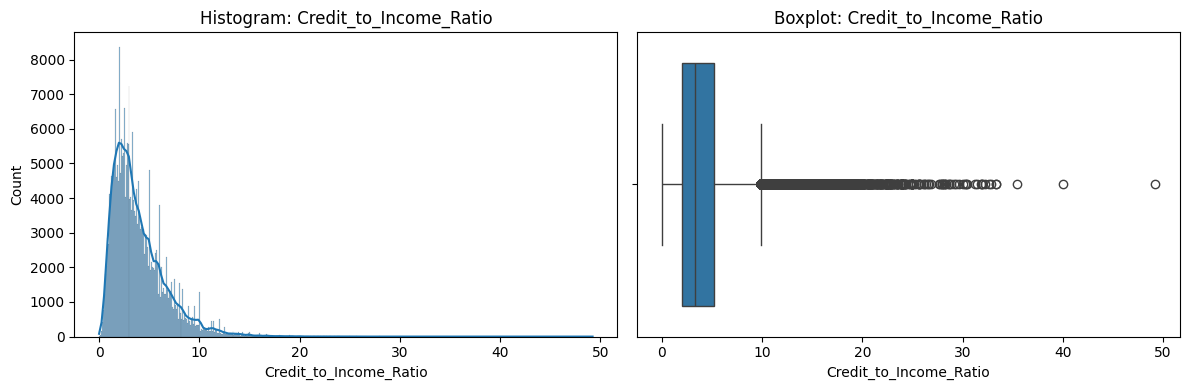

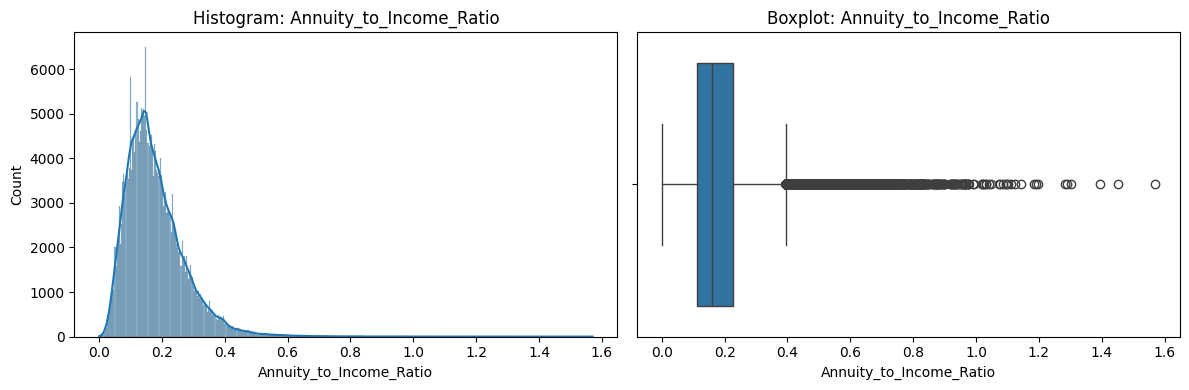

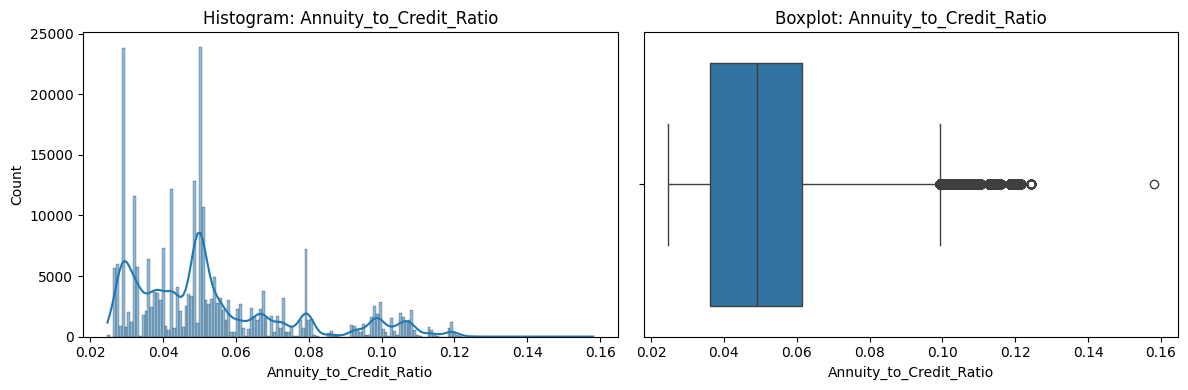

In [44]:
for col in part3:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(data=df, x=col, ax=axes[0], kde=True)
    axes[0].set_title(f"Histogram: {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot: {col}")

    plt.tight_layout()
    plt.show()

univarte_plots Categorical

In [45]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

In [46]:
top_n = 5
cols = ['NAME_INCOME_TYPE','OCCUPATION_TYPE','NAME_HOUSING_TYPE','ORGANIZATION_TYPE','CNT_FAM_MEMBERS','prev_num_rejected','prev_num_approved','pos_num_loans','AMT_REQ_CREDIT_BUREAU_YEAR','DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']

for col in cols:
    top_categories = df[col].value_counts().nlargest(top_n).index
    df[col] = df[col].where(df[col].isin(top_categories), 6)

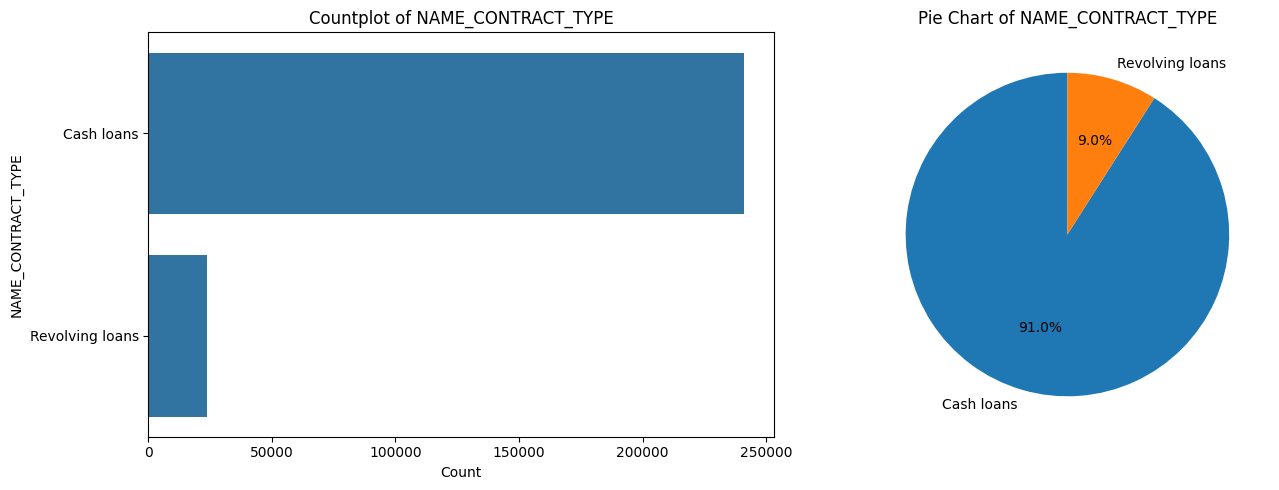

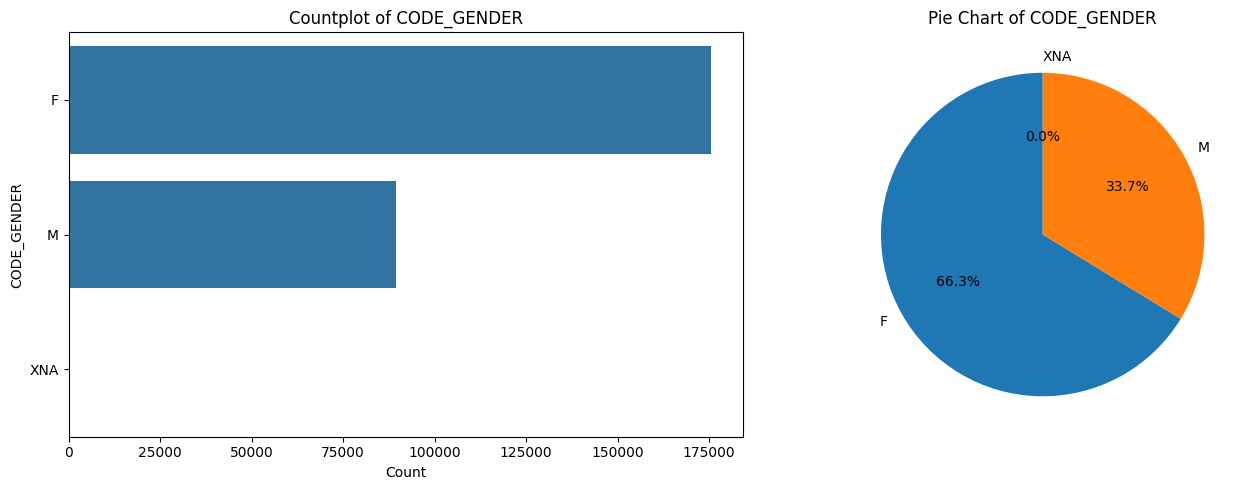

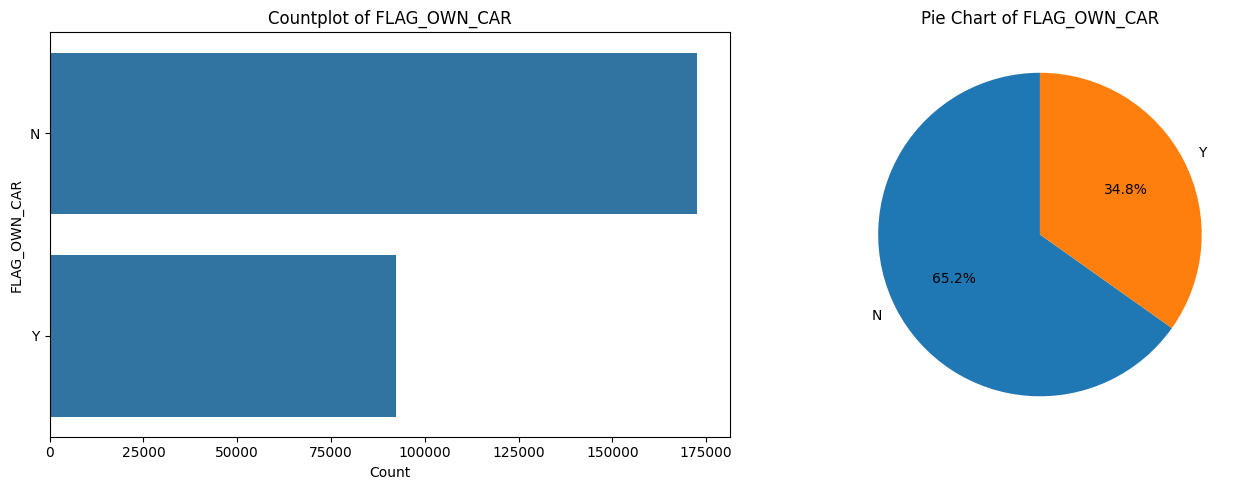

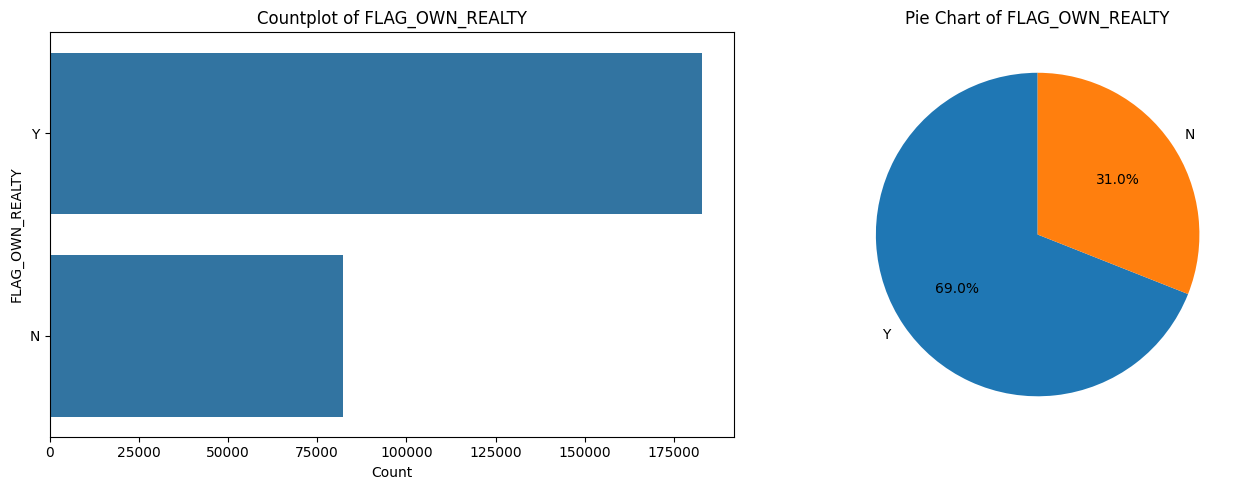

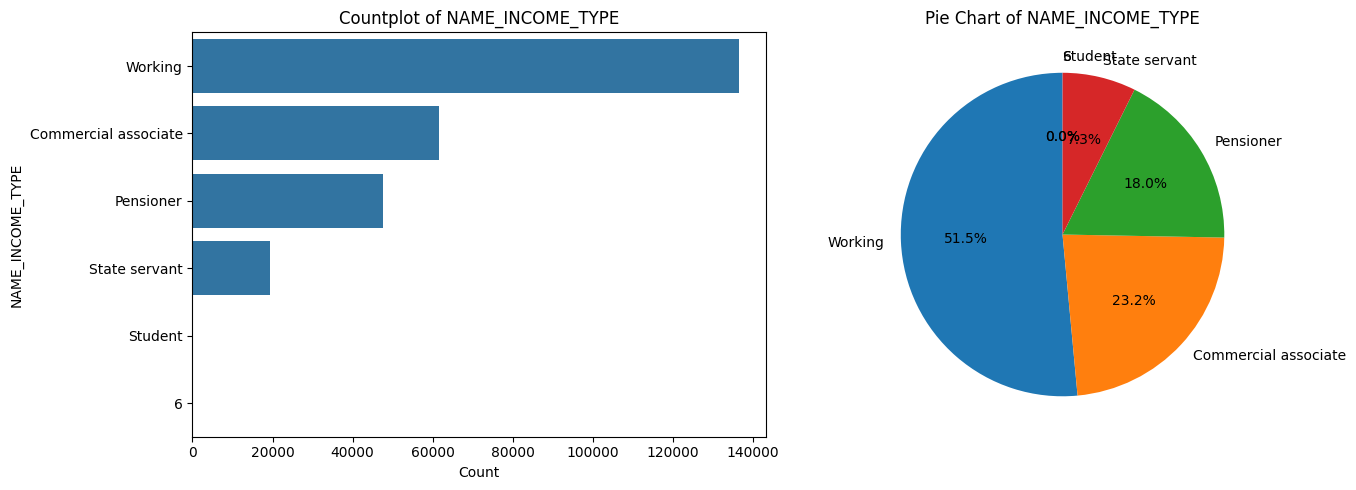

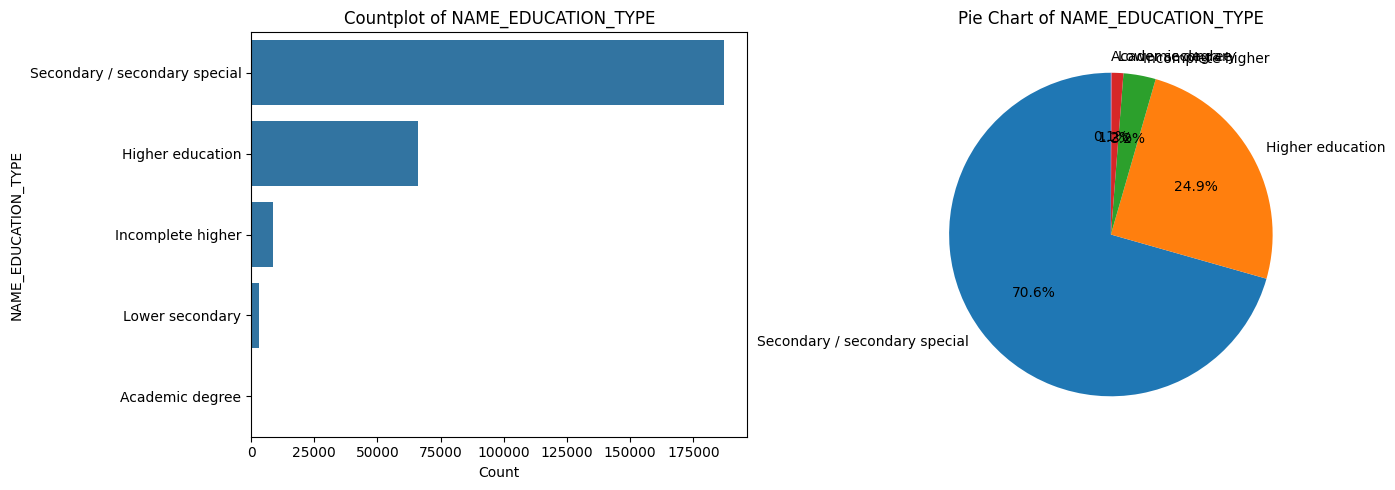

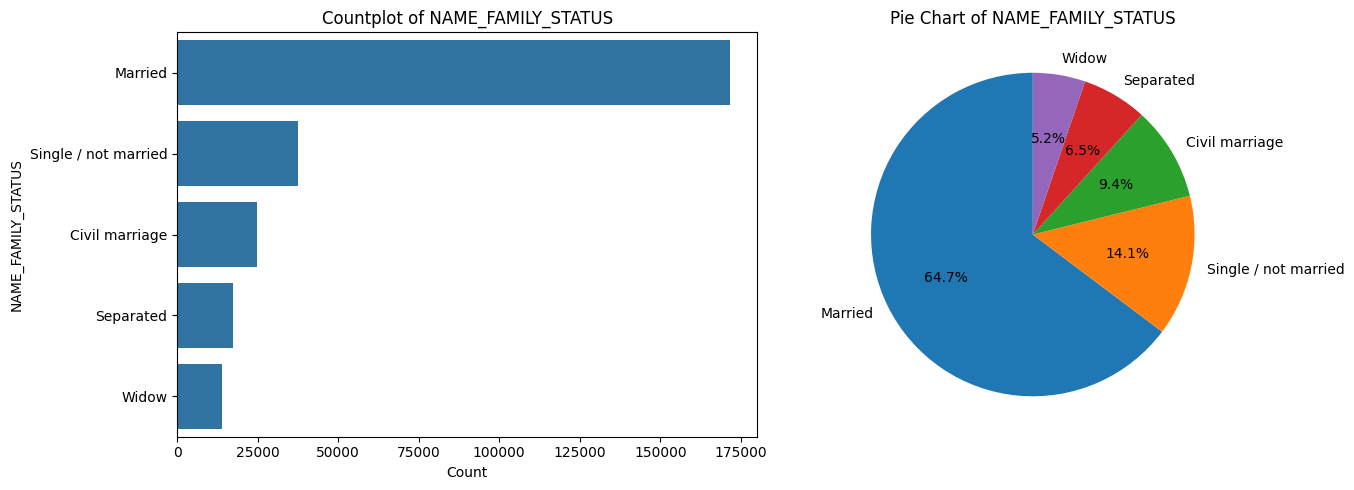

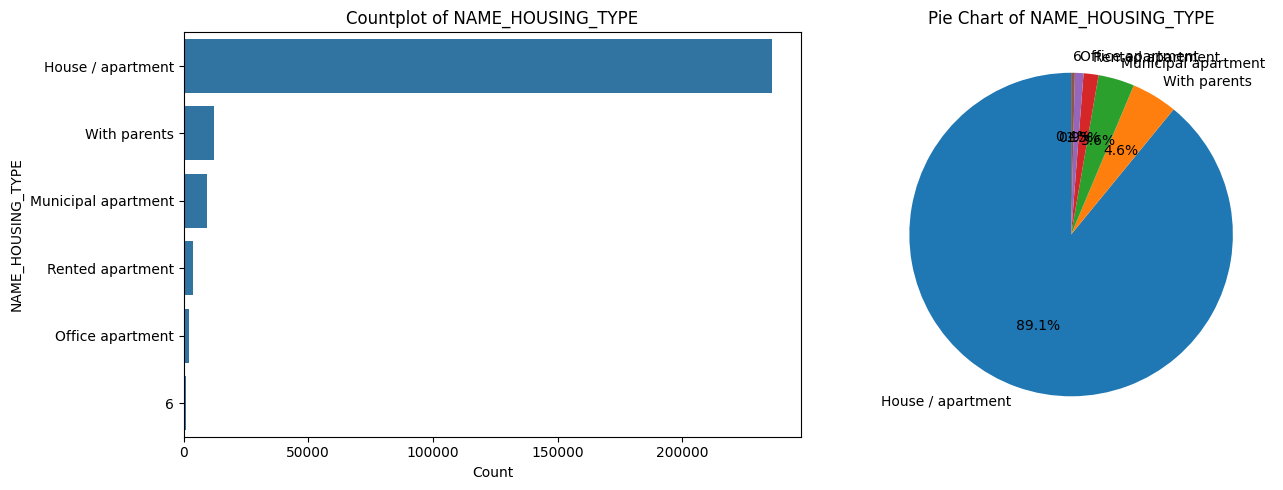

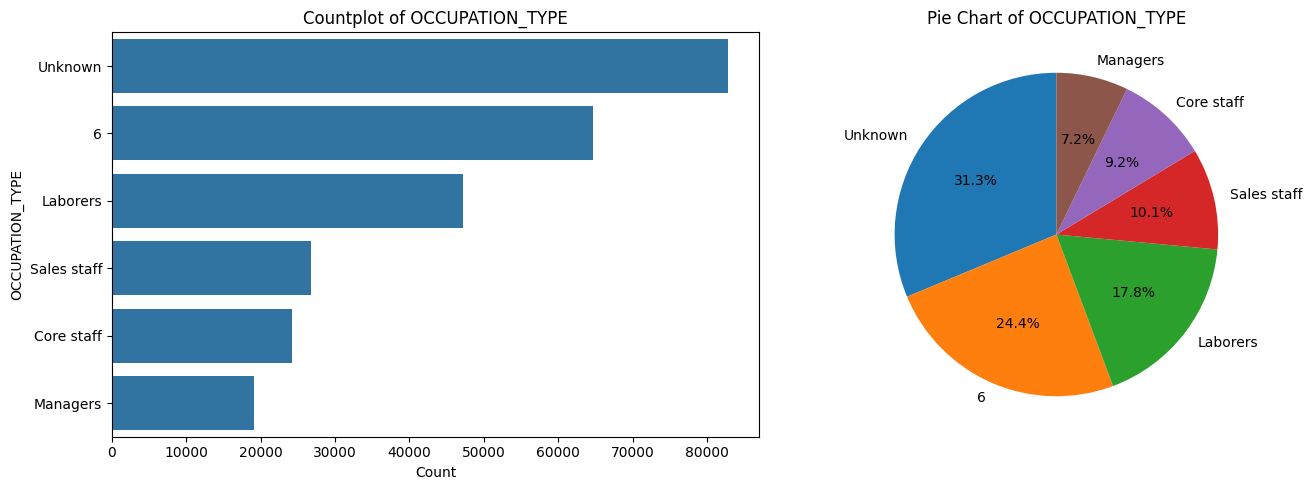

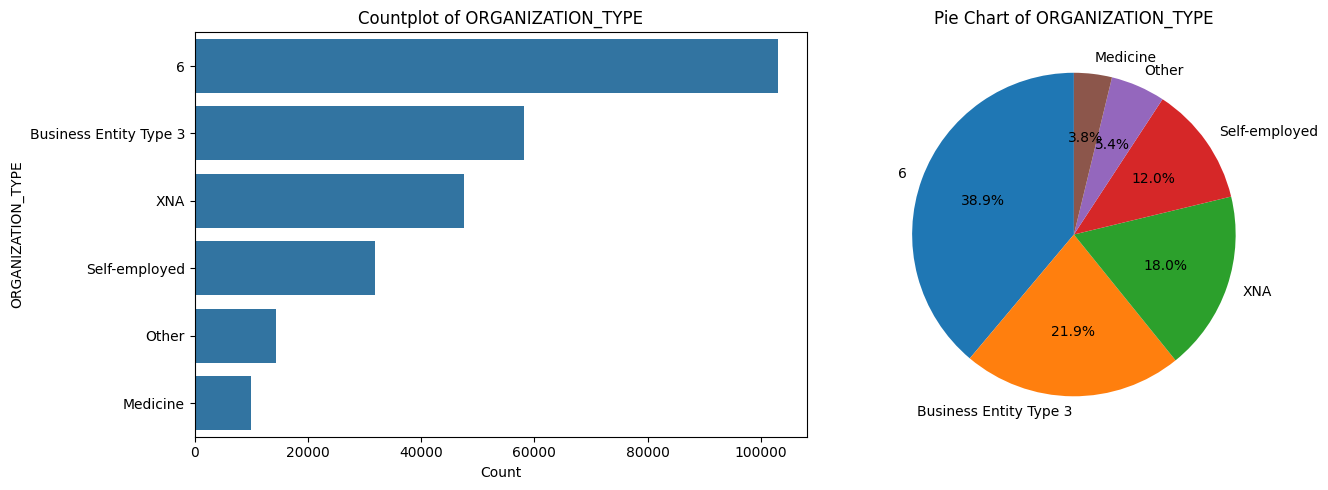

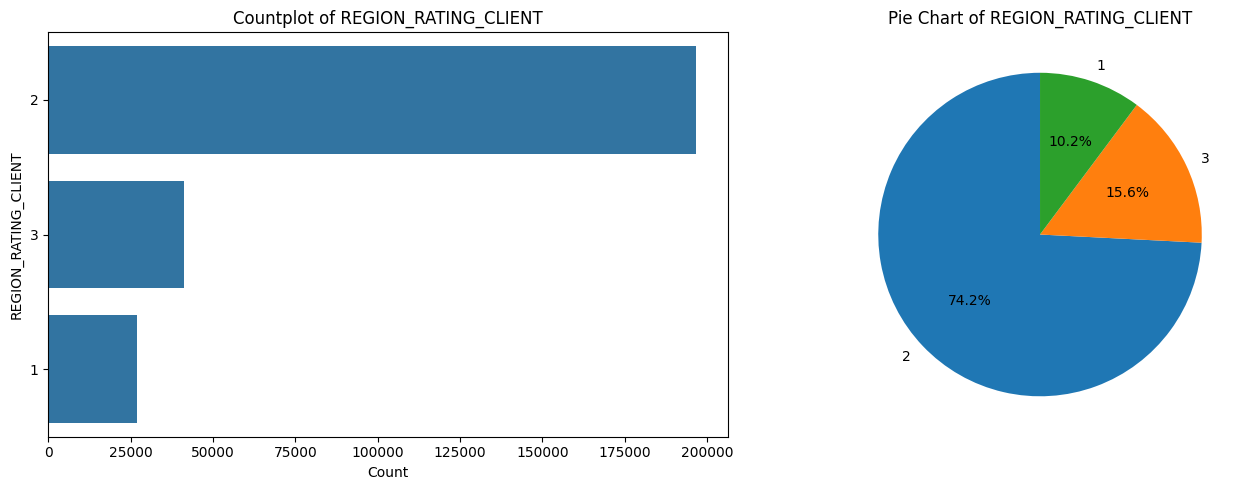

C:\Users\parvr\AppData\Local\Temp\ipykernel_28520\1870627589.py:20: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  pie_data = value_counts[:top_n]


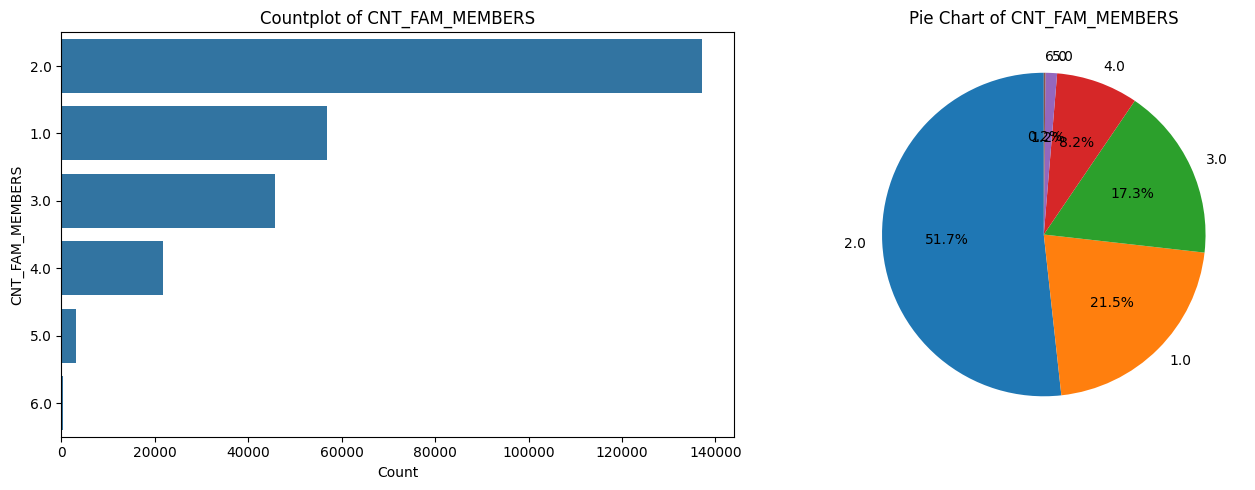

C:\Users\parvr\AppData\Local\Temp\ipykernel_28520\1870627589.py:20: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  pie_data = value_counts[:top_n]


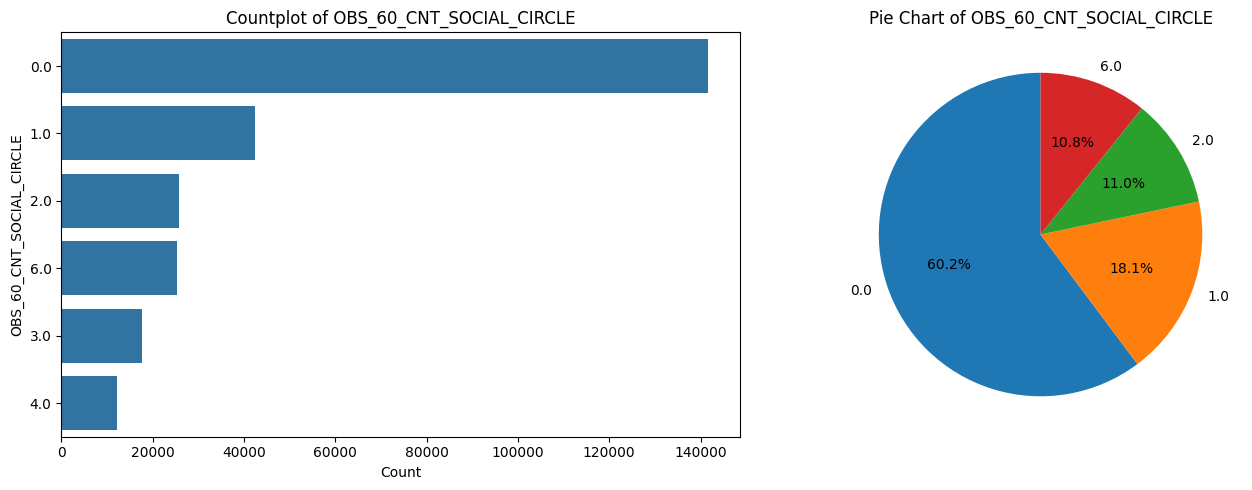

C:\Users\parvr\AppData\Local\Temp\ipykernel_28520\1870627589.py:20: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  pie_data = value_counts[:top_n]


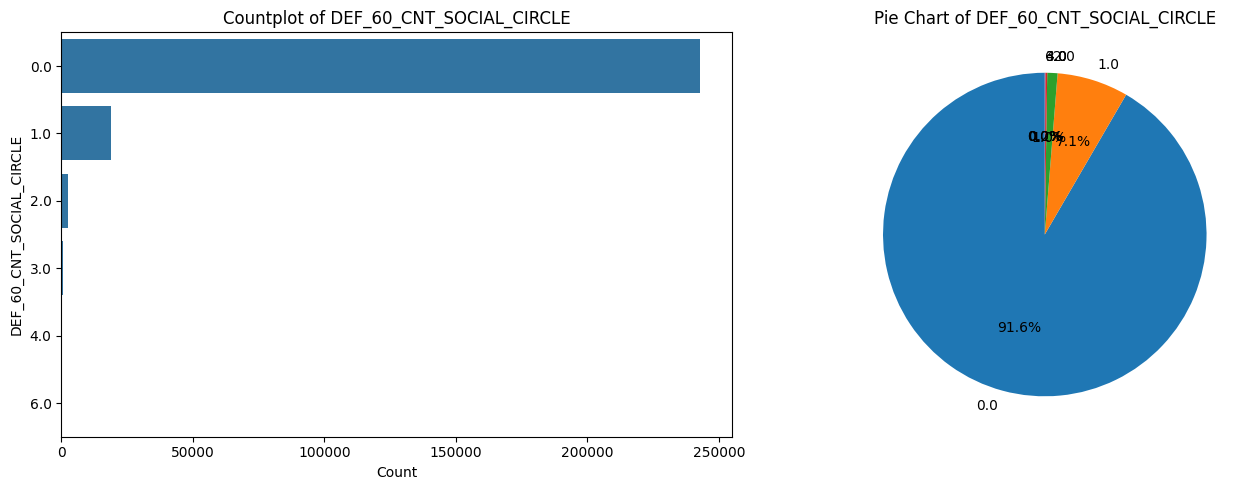

C:\Users\parvr\AppData\Local\Temp\ipykernel_28520\1870627589.py:20: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  pie_data = value_counts[:top_n]
C:\Users\parvr\AppData\Local\Temp\ipykernel_28520\1870627589.py:22: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  pie_data['Other'] = value_counts[top_n:].sum()


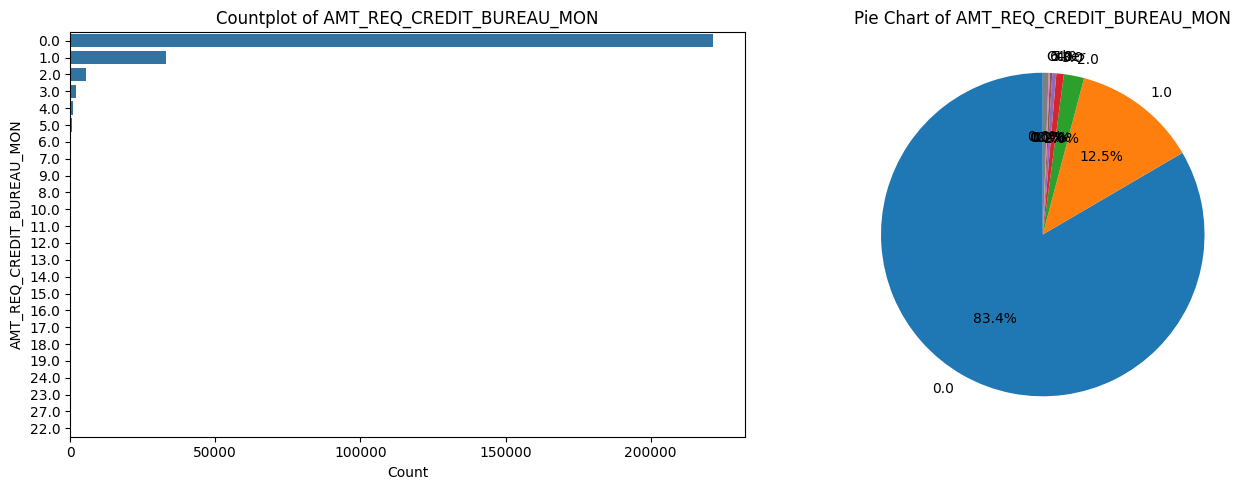

C:\Users\parvr\AppData\Local\Temp\ipykernel_28520\1870627589.py:20: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  pie_data = value_counts[:top_n]


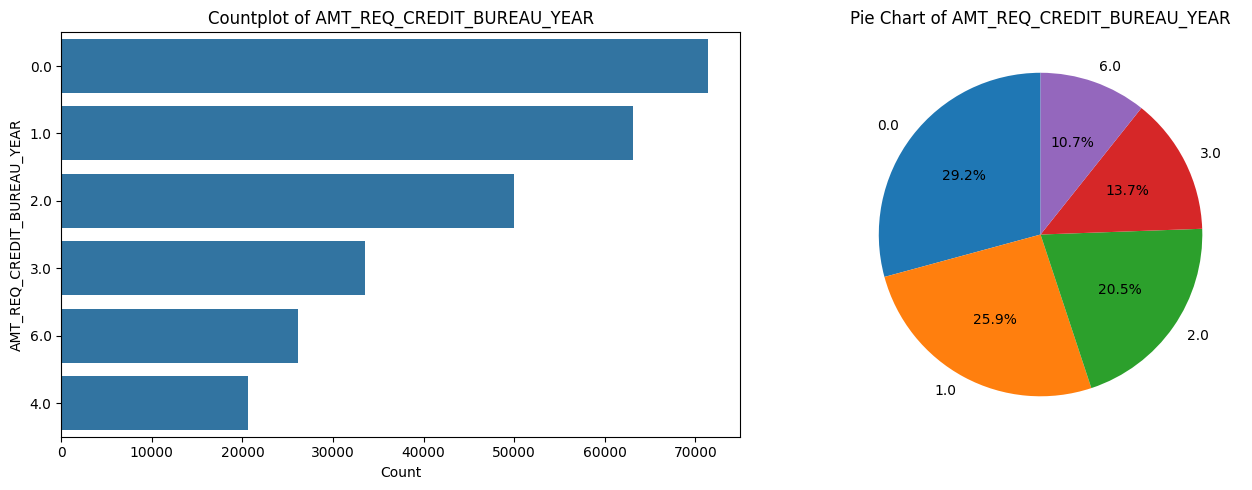

C:\Users\parvr\AppData\Local\Temp\ipykernel_28520\1870627589.py:20: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  pie_data = value_counts[:top_n]
C:\Users\parvr\AppData\Local\Temp\ipykernel_28520\1870627589.py:22: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  pie_data['Other'] = value_counts[top_n:].sum()


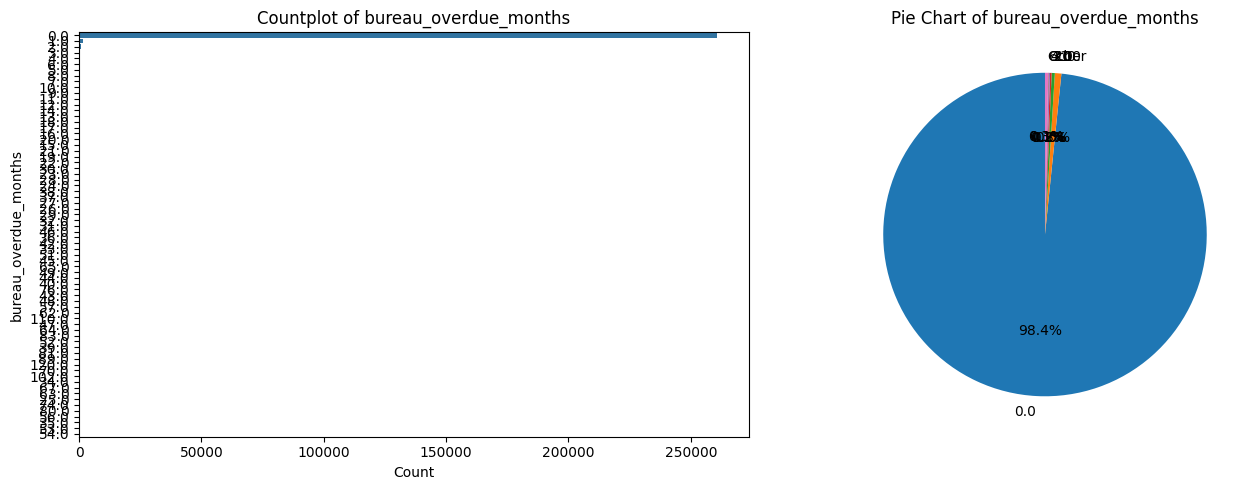

C:\Users\parvr\AppData\Local\Temp\ipykernel_28520\1870627589.py:20: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  pie_data = value_counts[:top_n]


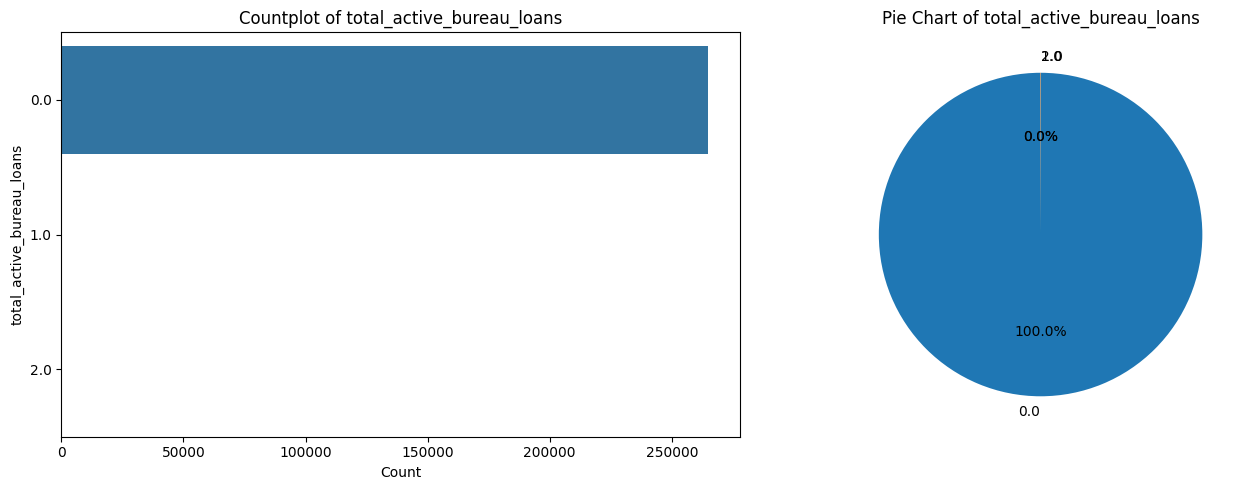

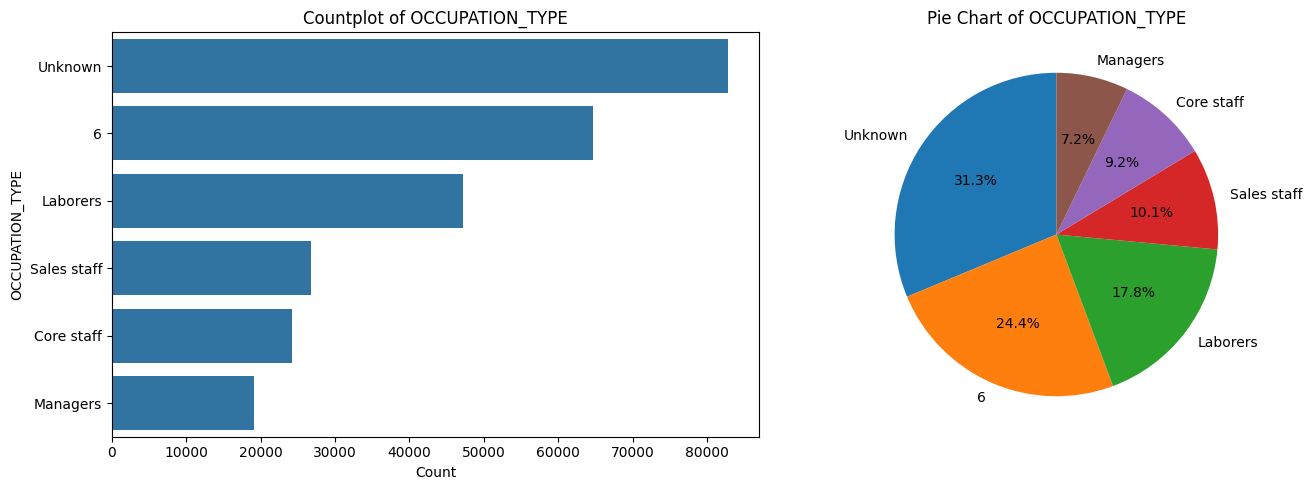

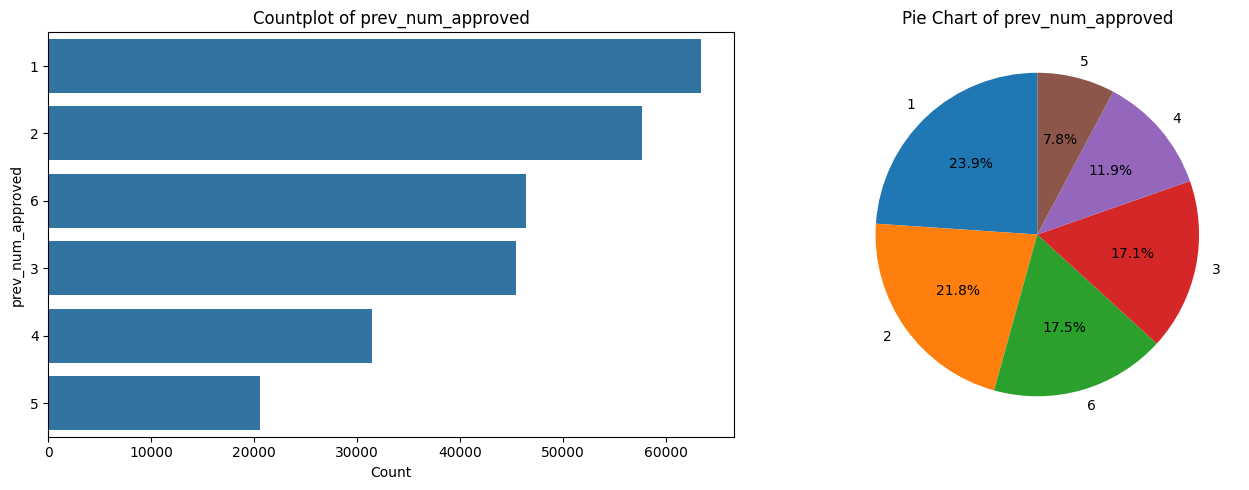

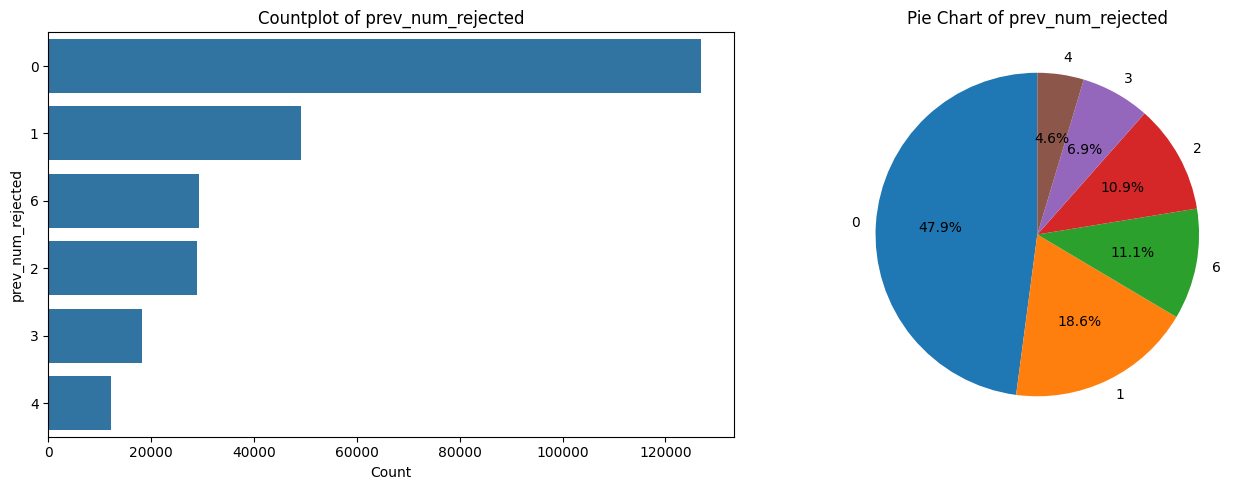

C:\Users\parvr\AppData\Local\Temp\ipykernel_28520\1870627589.py:20: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  pie_data = value_counts[:top_n]
C:\Users\parvr\AppData\Local\Temp\ipykernel_28520\1870627589.py:22: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  pie_data['Other'] = value_counts[top_n:].sum()


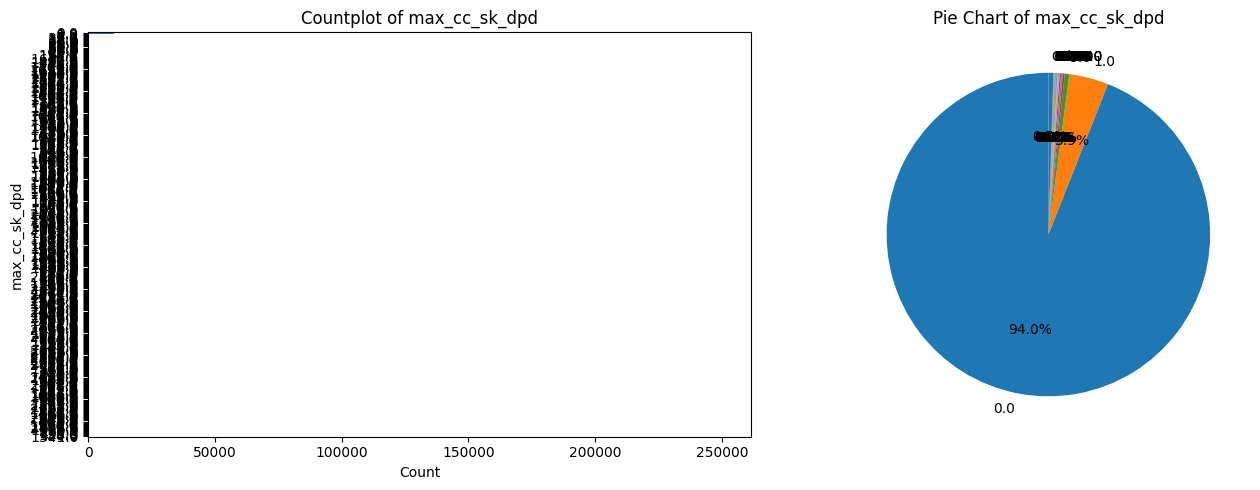

C:\Users\parvr\AppData\Local\Temp\ipykernel_28520\1870627589.py:20: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  pie_data = value_counts[:top_n]
C:\Users\parvr\AppData\Local\Temp\ipykernel_28520\1870627589.py:22: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  pie_data['Other'] = value_counts[top_n:].sum()


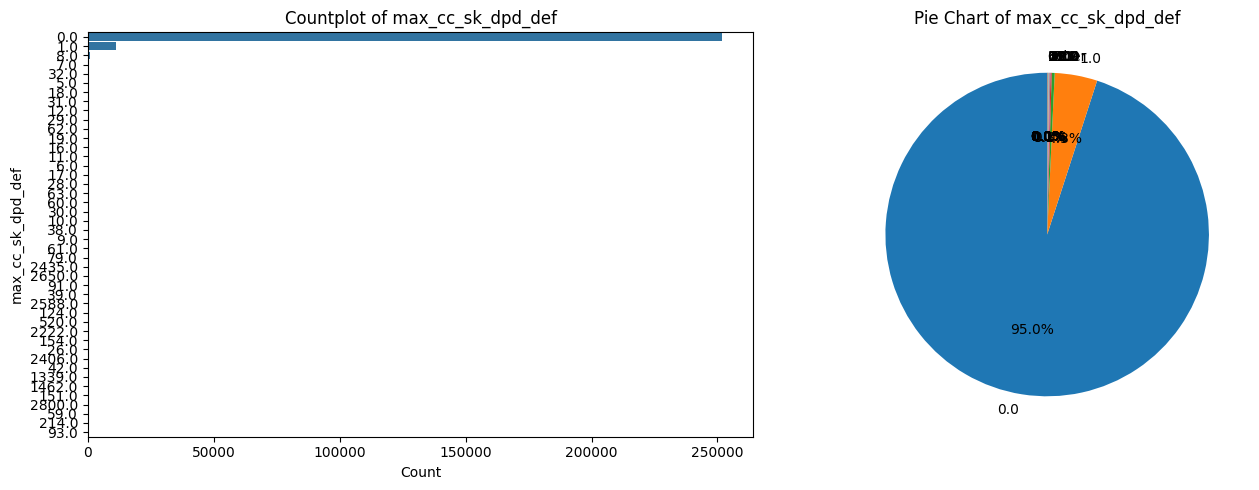

In [47]:
for col in list(cat_cols) + ['REGION_RATING_CLIENT','CNT_FAM_MEMBERS','OBS_60_CNT_SOCIAL_CIRCLE', 
                             'DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR','bureau_overdue_months',
                             'total_active_bureau_loans','OCCUPATION_TYPE','prev_num_approved', 'prev_num_rejected','max_cc_sk_dpd', 'max_cc_sk_dpd_def']:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Countplot
    sns.countplot(
        y=col,
        data=df,
        order=df[col].value_counts().index,
        ax=axes[0]
    )
    axes[0].set_title(f'Countplot of {col}')
    axes[0].set_xlabel('Count')
    axes[0].set_ylabel(col)

    #  Pie chart (top 8 categories only) 
    value_counts = df[col].value_counts()
    top_n = 6
    pie_data = value_counts[:top_n]
    if len(value_counts) > top_n:
        pie_data['Other'] = value_counts[top_n:].sum()

    axes[1].pie(
        pie_data,
        labels=pie_data.index,
        autopct='%1.1f%%',
        startangle=90
    )
    axes[1].set_title(f'Pie Chart of {col}')

    plt.tight_layout()
    plt.show()

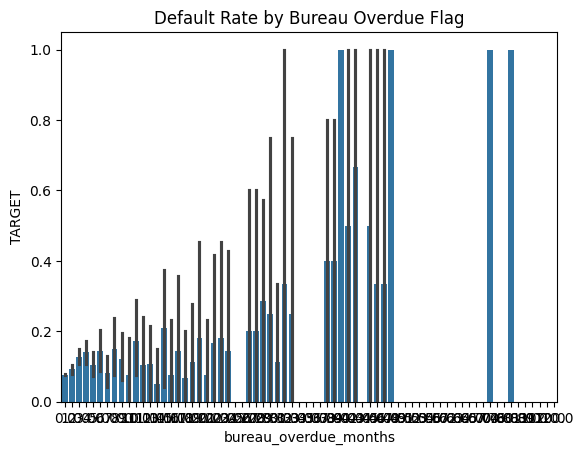

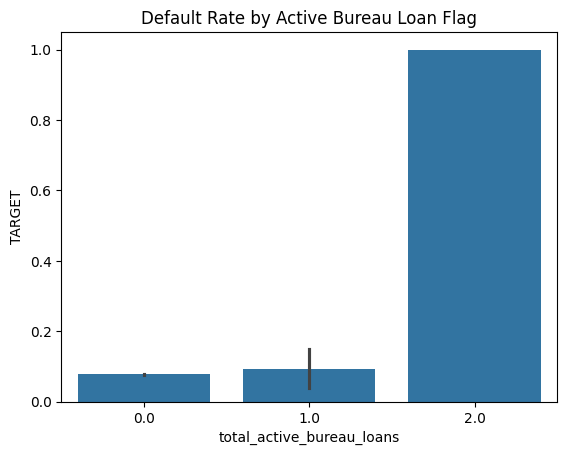

In [48]:

sns.barplot(x='bureau_overdue_months', y='TARGET', data=df)
plt.title('Default Rate by Bureau Overdue Flag')
plt.show()

sns.barplot(x='total_active_bureau_loans', y='TARGET', data=df)
plt.title('Default Rate by Active Bureau Loan Flag')
plt.show()


Multivariate Analysis

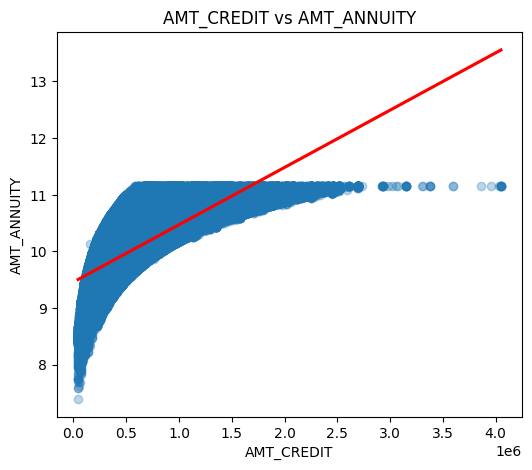

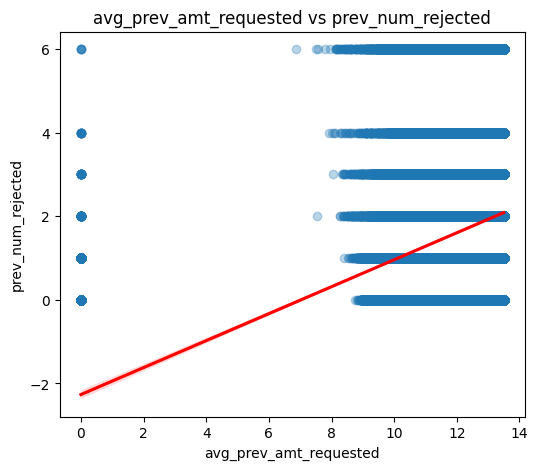

c:\Users\parvr\anaconda3\envs\fintech\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1620: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


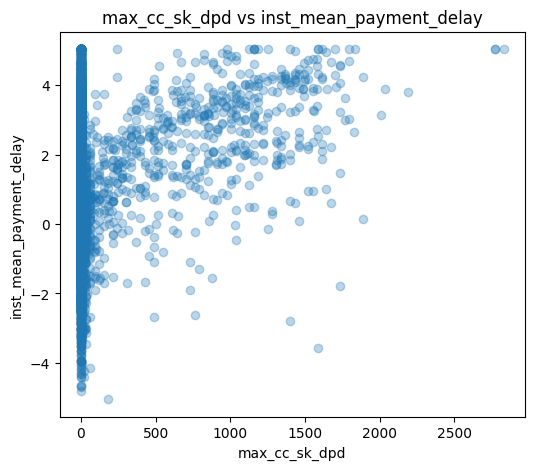

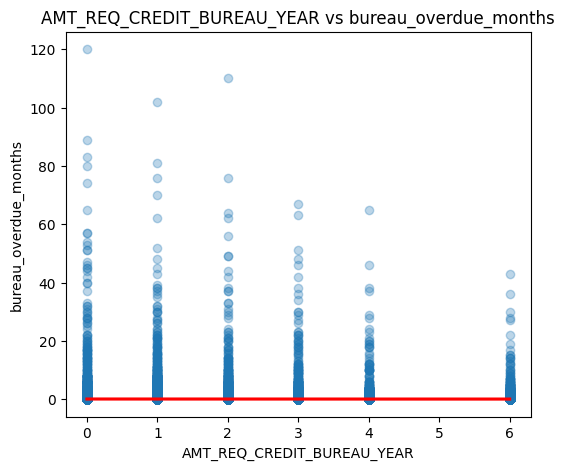

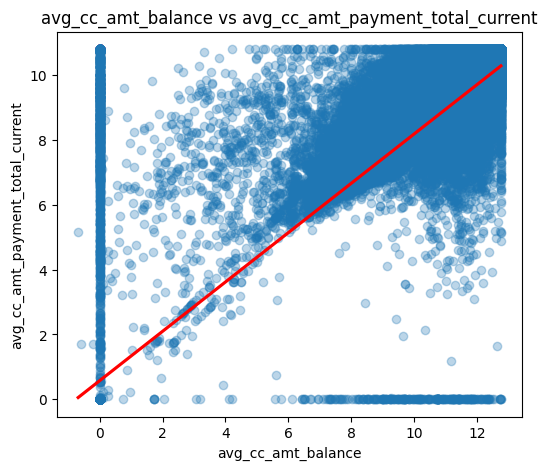

In [50]:
num_num_pairs = [
    ('AMT_CREDIT', 'AMT_ANNUITY'),
    ('avg_prev_amt_requested', 'prev_num_rejected'),
    ('max_cc_sk_dpd', 'inst_mean_payment_delay'),
    ('AMT_REQ_CREDIT_BUREAU_YEAR', 'bureau_overdue_months'),
    ('avg_cc_amt_balance', 'avg_cc_amt_payment_total_current')
]

for x, y in num_num_pairs:
    plt.figure(figsize=(6, 5))
    sns.regplot(
        x=df[x],
        y=df[y],
        scatter_kws={'alpha': 0.3},
        line_kws={'color': 'red'}
    )
    plt.title(f'{x} vs {y}')
    plt.show()

In [51]:
df1['HAS_CC_DELINQUENCY'] = (df1['max_cc_sk_dpd'] > 0).astype(int)
df1['DELINQUENCY_SEVERITY'] = df1['HAS_CC_DELINQUENCY'] * df1['inst_mean_payment_delay']
df1.drop(columns=['max_cc_sk_dpd'], inplace=True, errors='ignore')

In [52]:
df1['CC_PAYMENT_RATIO'] = (
    df1['avg_cc_amt_payment_total_current'] /
    (df1['avg_cc_amt_balance'] + 1)
)

df1['NO_CC_PAYMENT_FLAG'] = (df1['avg_cc_amt_payment_total_current'] == 0).astype(int)
df1.drop(columns=['avg_cc_amt_payment_total_current', 'avg_cc_amt_balance'], inplace=True, errors='ignore')

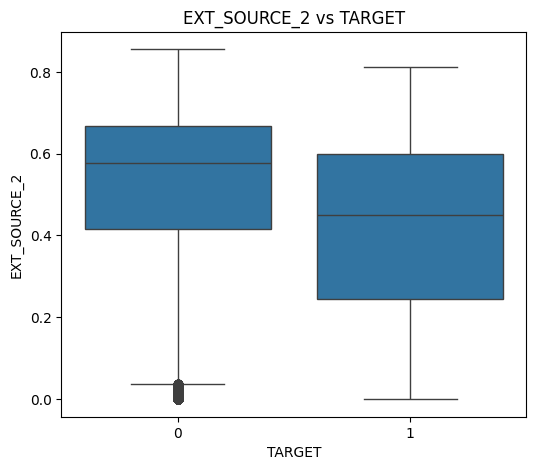

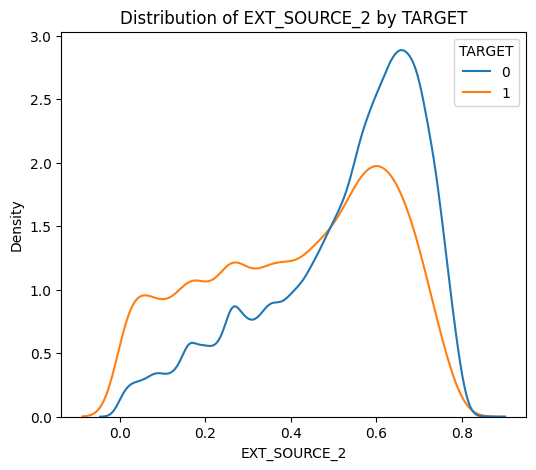

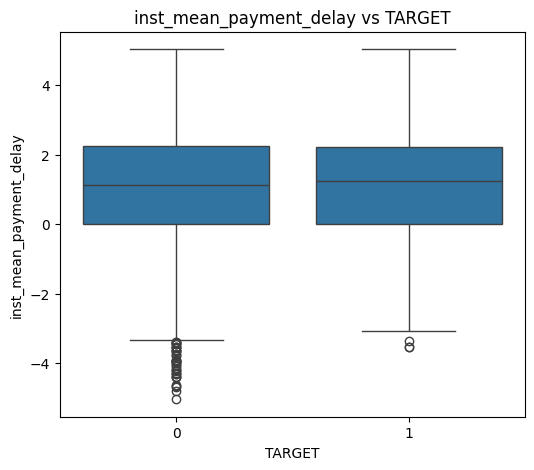

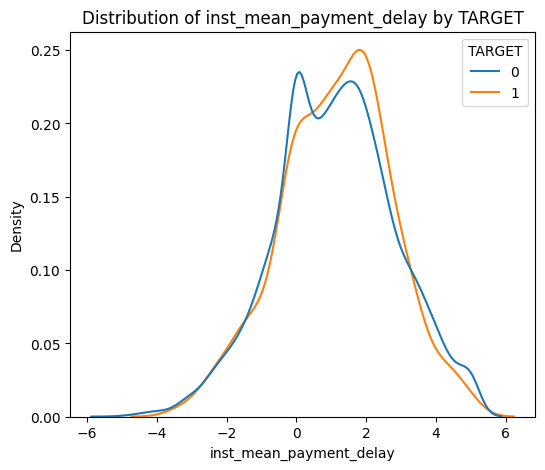

In [53]:
num_target_pairs = [
    'EXT_SOURCE_2',
    'inst_mean_payment_delay'
]

for col in num_target_pairs:
    plt.figure(figsize=(6, 5))
    sns.boxplot(x='TARGET', y=col, data=df)
    plt.title(f'{col} vs TARGET')
    plt.show()

    plt.figure(figsize=(6, 5))
    sns.kdeplot(data=df, x=col, hue='TARGET', common_norm=False)
    plt.title(f'Distribution of {col} by TARGET')
    plt.show()

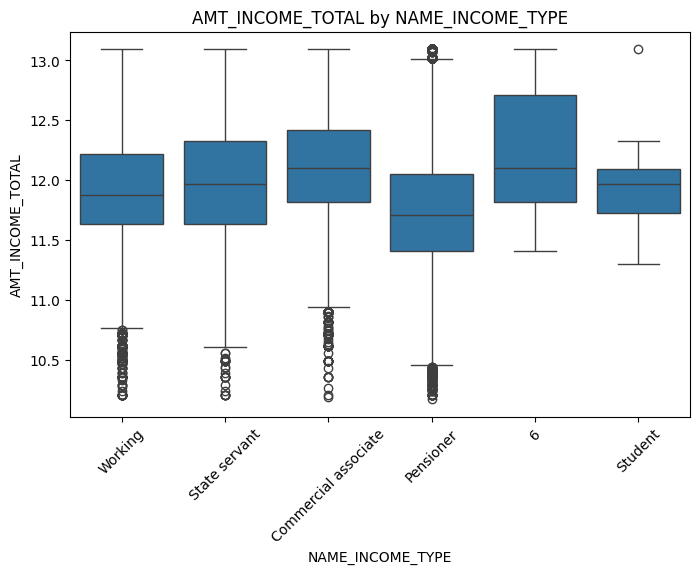

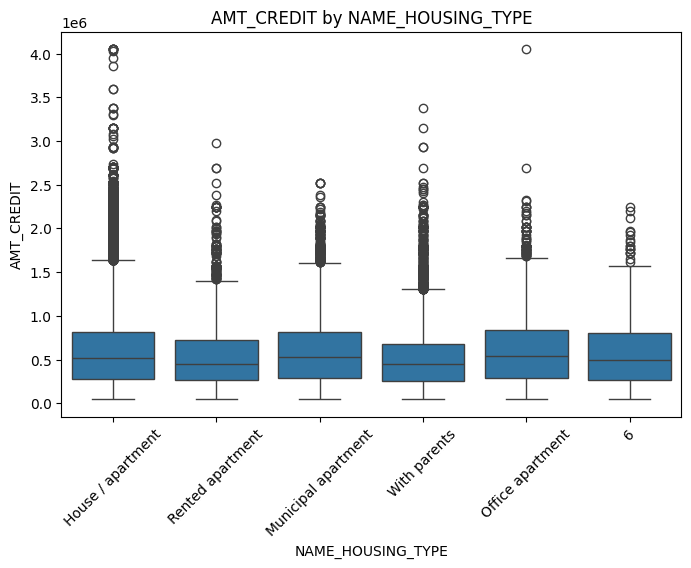

In [54]:
cat_num_pairs = [
    ('NAME_INCOME_TYPE', 'AMT_INCOME_TOTAL'),
    ('NAME_HOUSING_TYPE', 'AMT_CREDIT')
]

for cat, num in cat_num_pairs:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=cat, y=num, data=df)
    plt.xticks(rotation=45)
    plt.title(f'{num} by {cat}')
    plt.show()


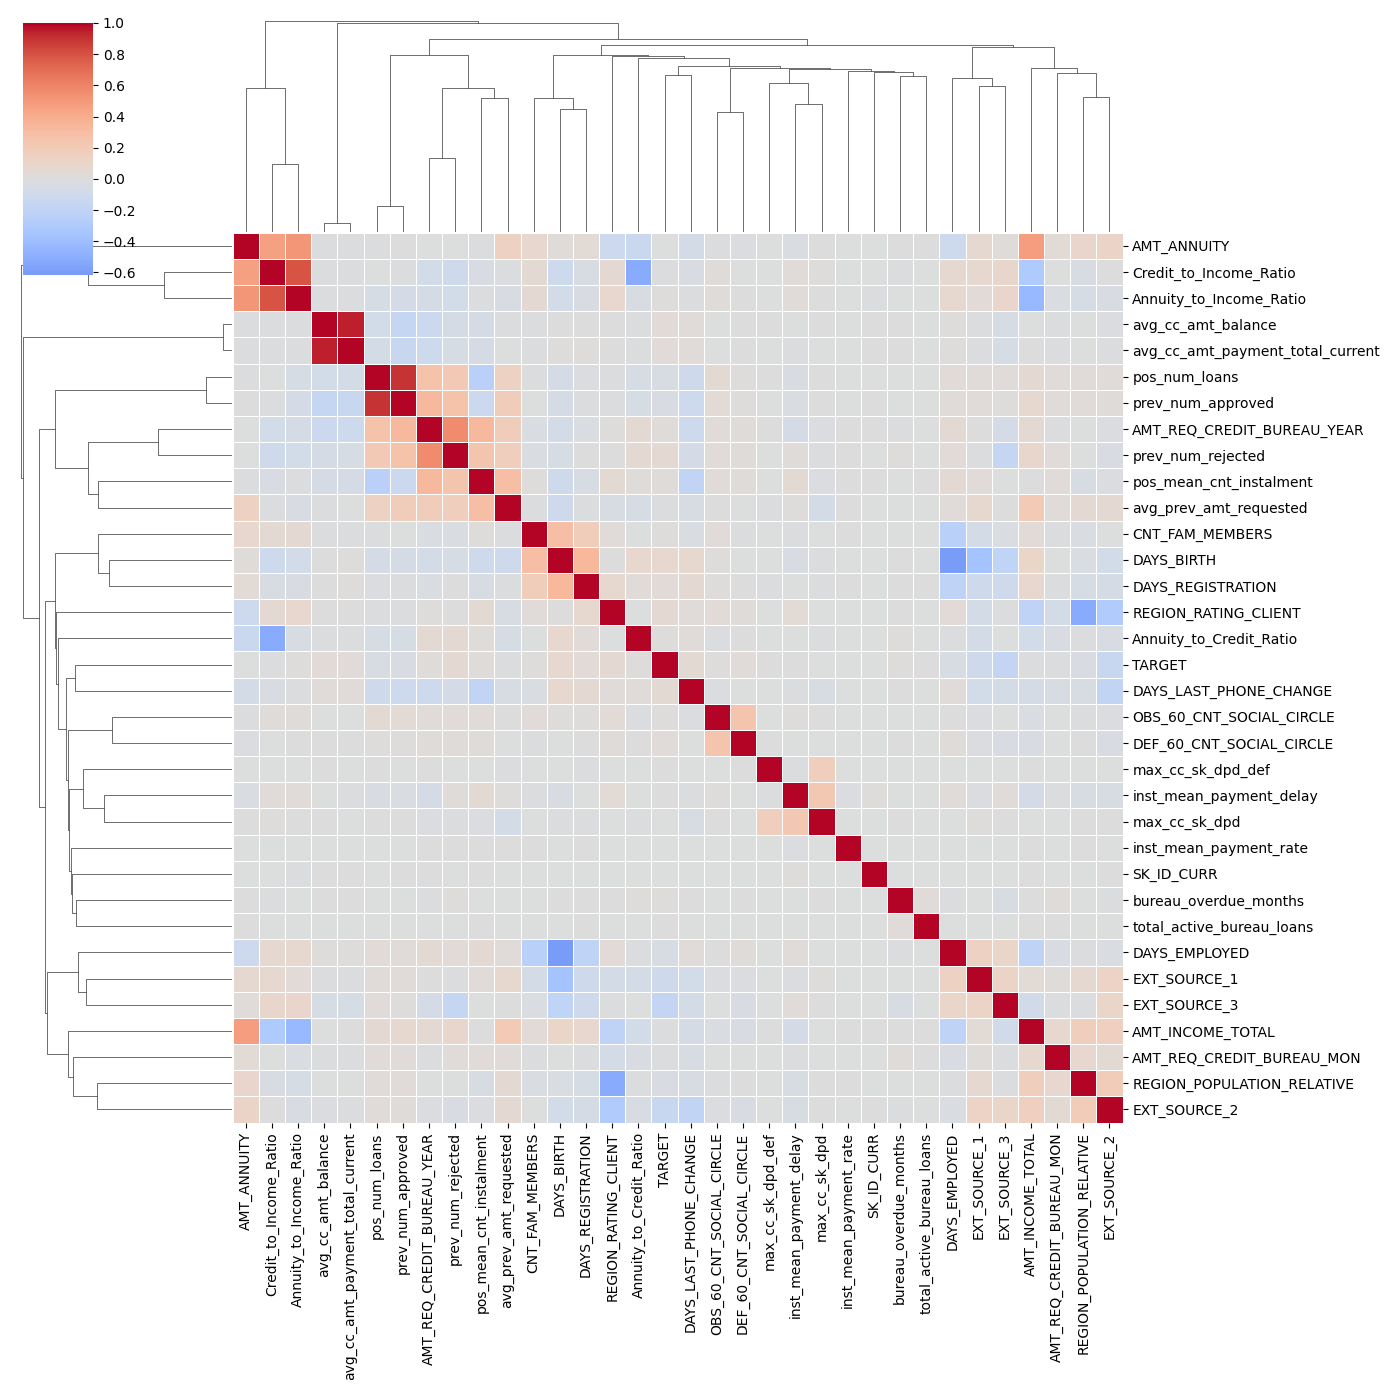

In [55]:
num_df = df.select_dtypes(include=['int64', 'float64'])
num_df = num_df.drop(columns=['AMT_CREDIT'])

# Calculate correlation with pairwise deletion
corr = num_df.corr(method='pearson', min_periods=10)  
corr = corr.fillna(0)

sns.clustermap(
    corr,
    cmap='coolwarm',
    center=0,
    figsize=(14, 14),
    linewidths=0.5
)

plt.show()

In [56]:
X = num_df.drop(columns=['SK_ID_CURR', 'TARGET'], errors='ignore')
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())


Explained variance ratio: [0.08384756 0.07892156]
Total variance explained: 0.16276912200615765


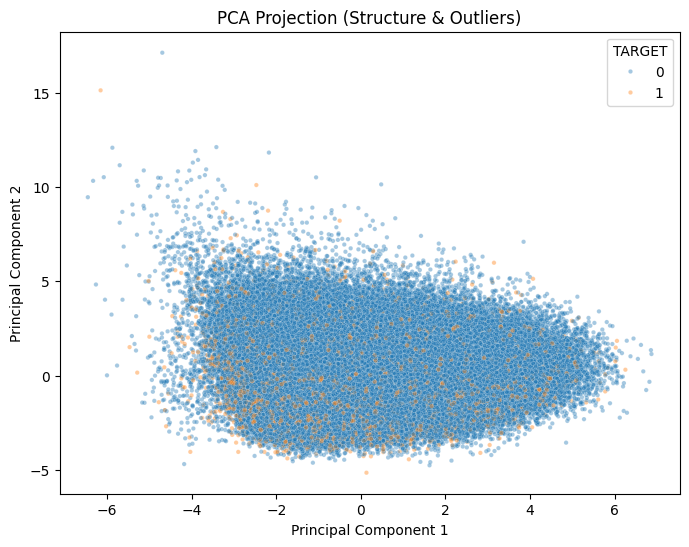

In [58]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df['TARGET'],
    alpha=0.4,
    s=10
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (Structure & Outliers)')
plt.show()


In [65]:
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_REGISTRATION', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'bureau_overdue_months', 'total_active_bureau_loans', 'pos_num_loans',
       'pos_mean_cnt_instalment', 'inst_mean_payment_delay',
       'inst_mean_payment_rate', 'avg_prev_amt_requested', 'prev_num_approved',
       'prev_num_rejected', 'max_cc_sk_dpd_def', 'Credit_to_Income_Ratio',
       'Annuity_to_Income_Ratio', 'Annuity_to_Credit_Ratio', 'EMPLOYED_FLAG

In [66]:
df1.shape

(264909, 46)

In [ ]:
final_features_classification = [

    # numeric (raw / ratios)
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',

    'Credit_to_Income_Ratio',
    'Annuity_to_Income_Ratio',
    'Annuity_to_Credit_Ratio',

    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',

    'REGION_POPULATION_RELATIVE',
    'DAYS_BIRTH',
    'DAYS_REGISTRATION',
    'DAYS_LAST_PHONE_CHANGE',
    'CNT_FAM_MEMBERS',
    'REGION_RATING_CLIENT',

    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE',

    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_YEAR',

    'bureau_overdue_months',
    'total_active_bureau_loans',

    'pos_num_loans',
    'pos_mean_cnt_instalment',

    'inst_mean_payment_delay',
    'inst_mean_payment_rate',

    'avg_prev_amt_requested',
    'prev_num_approved',
    'prev_num_rejected',

    'max_cc_sk_dpd_def',
    'CC_PAYMENT_RATIO',
    'DELINQUENCY_SEVERITY',
    'avg_cc_max_limit_used',
    'avg_cc_mean_drawings_atm_current',

    # binary flags
    'HAS_CC_DELINQUENCY',
    'NO_CC_PAYMENT_FLAG',

    # categorical (encode later)
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE',
    'ORGANIZATION_TYPE',

    # target
    'TARGET'
]


In [ ]:
final_features_regression = [

    # numeric 
    'AMT_INCOME_TOTAL',
    'DAYS_BIRTH',
    'DAYS_REGISTRATION',
    'CNT_FAM_MEMBERS',
    'REGION_RATING_CLIENT',
    'REGION_POPULATION_RELATIVE',

    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',

    'Credit_to_Income_Ratio',
    'Annuity_to_Income_Ratio',

    'pos_num_loans',
    'pos_mean_cnt_instalment',

    'avg_prev_amt_requested',
    'prev_num_approved',
    'avg_cc_max_limit_used',

    # categorical
    'NAME_CONTRACT_TYPE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE',
    'ORGANIZATION_TYPE',

    # target
    'AMT_CREDIT'
]


In [69]:
df1[final_features_regression].to_csv("../data/final/Regression_table.csv", index=False)
df1[final_features_classification].to_csv("../data/final/Classification_table.csv", index=False)